Merge datasets

In [1]:
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load weather data Excel with multiple sheets and combine into one DataFrame
weather_file = '/content/Crop_Weather_Data_2020_2021_final.xlsx'
xls = pd.ExcelFile(weather_file)
df_weather = pd.DataFrame()
for sheet in xls.sheet_names:
    df = xls.parse(sheet)
    crop, location, year = sheet.split('_')
    df['Crop'] = crop
    df['Location'] = location
    df['Year'] = int(year)
    df_weather = pd.concat([df_weather, df], ignore_index=True)

# Aggregate weather data by crop, location, and year with mean or sum
weather_agg = df_weather.groupby(['Crop', 'Location', 'Year']).agg({
    'Avg Temperature (°C)': 'mean',
    'Precipitation (mm)': 'sum',
    'Relative Humidity (%)': 'mean'
}).reset_index()

# Load your original crop dataset
crop_file = '/content/newProcessed_Dataset.xlsx'
df_crop = pd.read_excel(crop_file)

# Mapping crop keys to your dataset naming
crop_map = {
    'Boro': 'Boro',
    'T.Aus': 'T. Aus',
    'T.Aman': 'T. Aman'
}

# Merge weather features for each crop into your dataset
for crop_key, crop_col_suffix in crop_map.items():
    weather_sub = weather_agg[weather_agg['Crop'] == crop_key].copy()
    weather_sub = weather_sub.rename(columns={
        'Avg Temperature (°C)': f'Avg_Temp_{crop_col_suffix}',
        'Precipitation (mm)': f'Precipitation_{crop_col_suffix}',
        'Relative Humidity (%)': f'Rel_Humidity_{crop_col_suffix}'
    })
    df_crop = pd.merge(df_crop, weather_sub[['Location', 'Year', f'Avg_Temp_{crop_col_suffix}',
                                             f'Precipitation_{crop_col_suffix}', f'Rel_Humidity_{crop_col_suffix}']],
                       how='left', left_on=['Location', 'Year'], right_on=['Location', 'Year'])

# Save the merged dataset
df_crop.to_excel('/content/Merged_Crop_Weather_Data.xlsx', index=False)

EDA

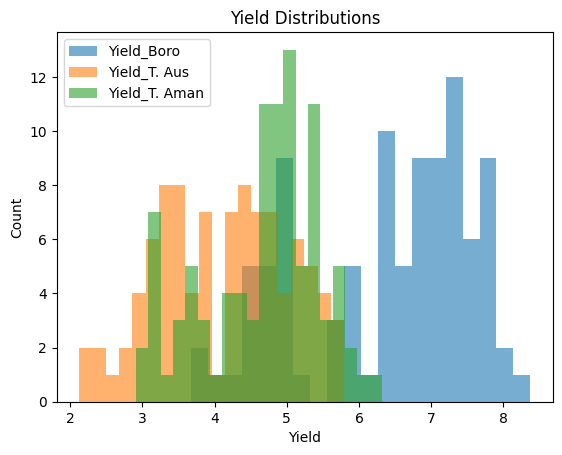

<Figure size 640x480 with 0 Axes>

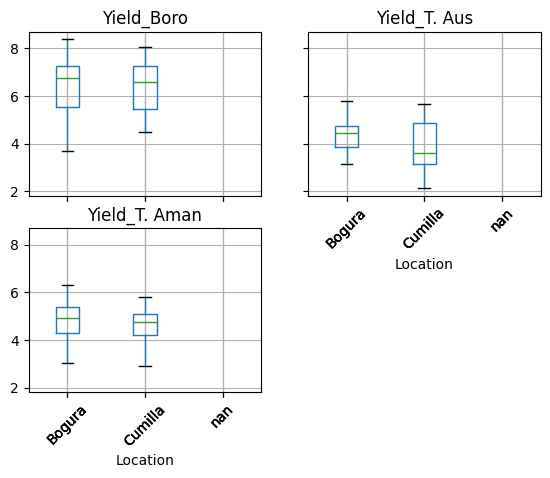

<Figure size 640x480 with 0 Axes>

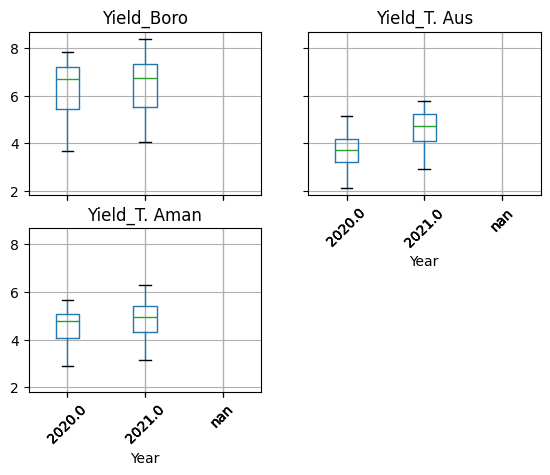

<Figure size 640x480 with 0 Axes>

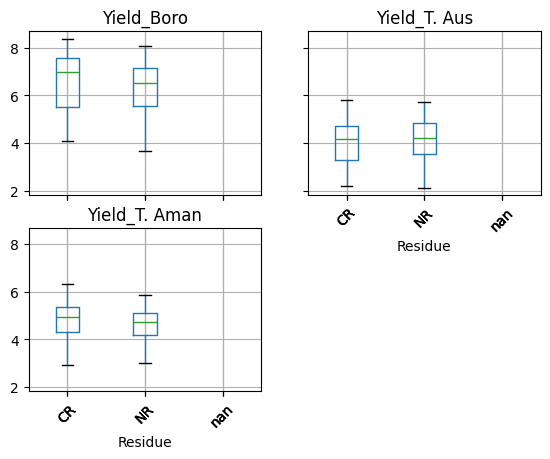

<Figure size 640x480 with 0 Axes>

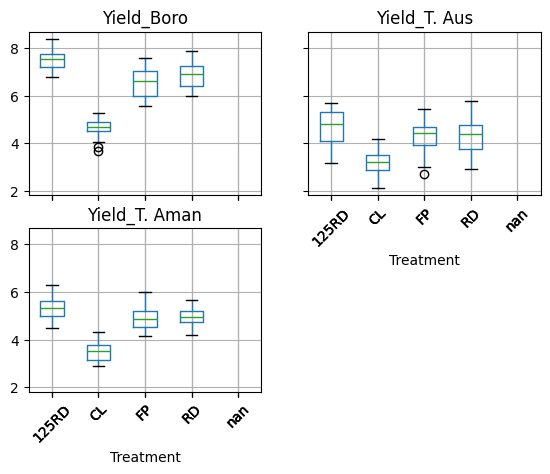

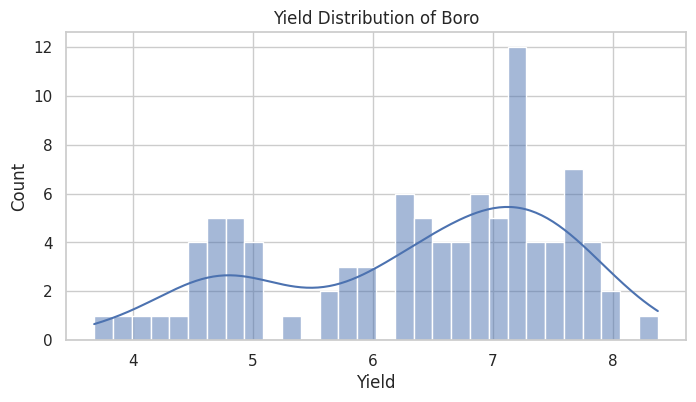

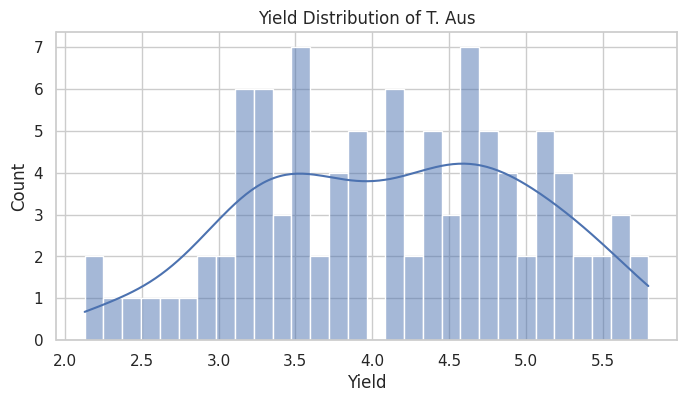

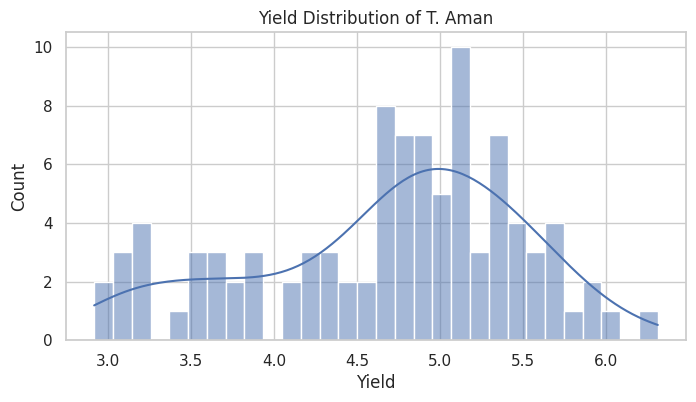

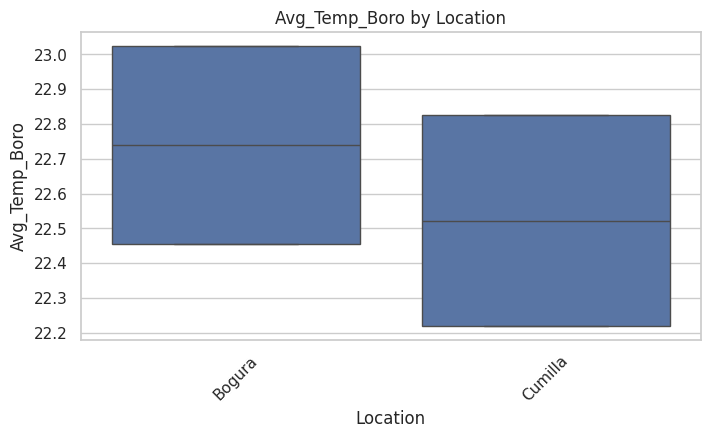

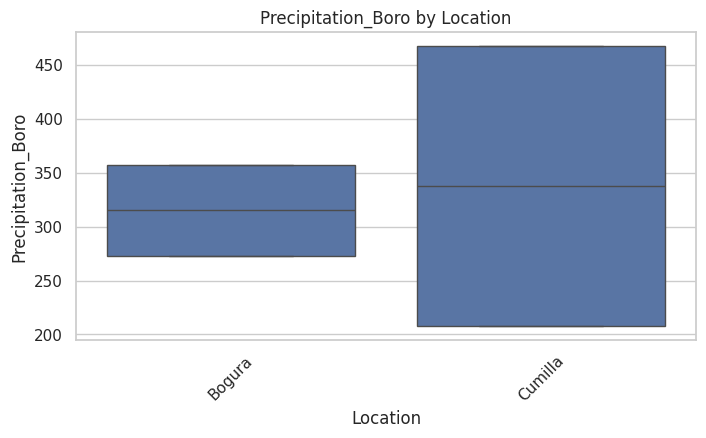

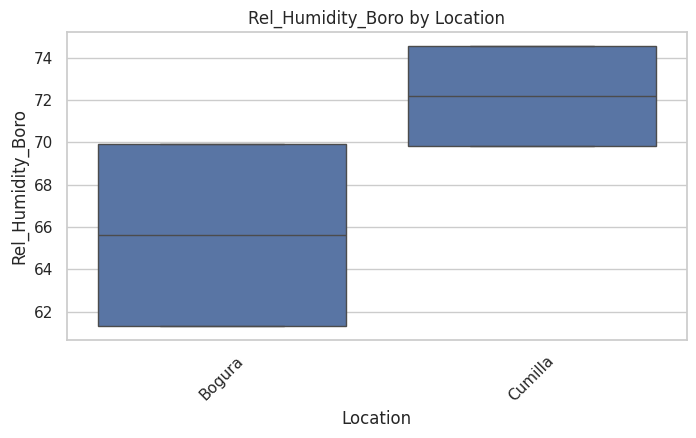

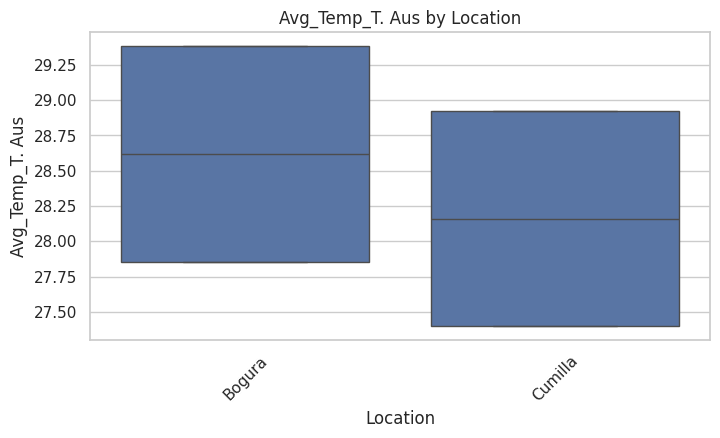

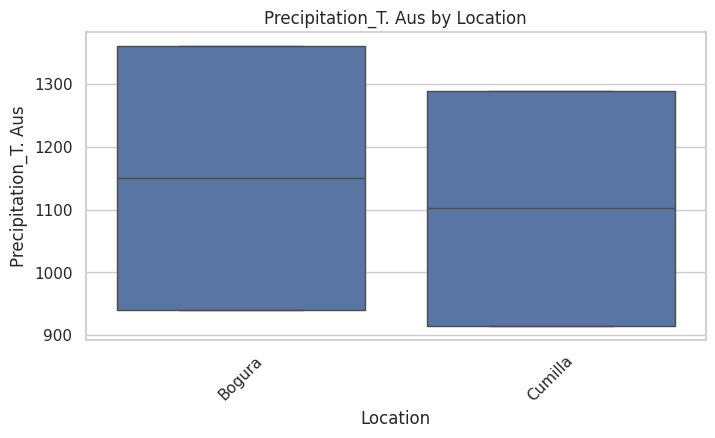

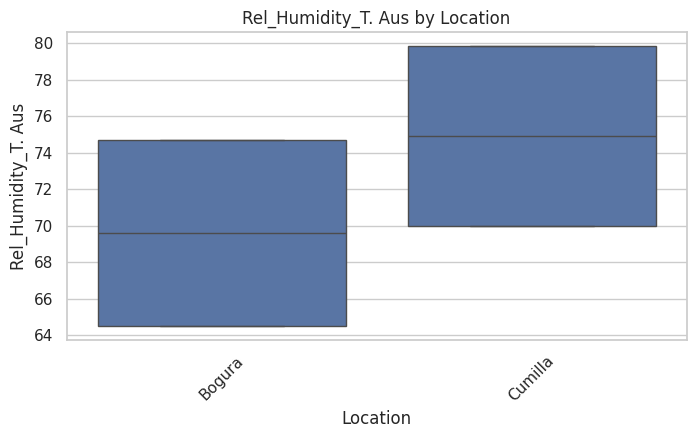

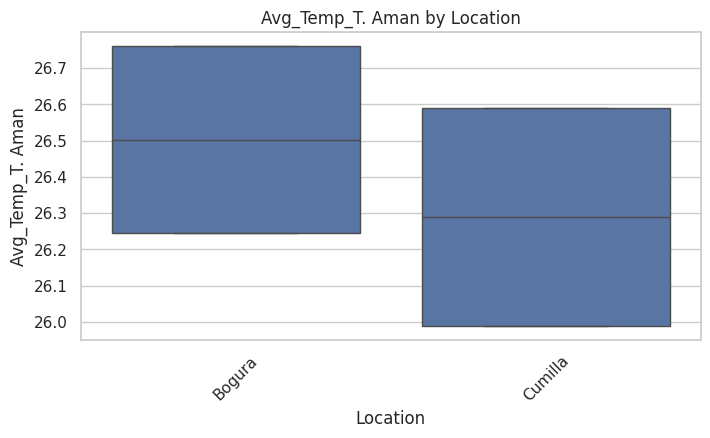

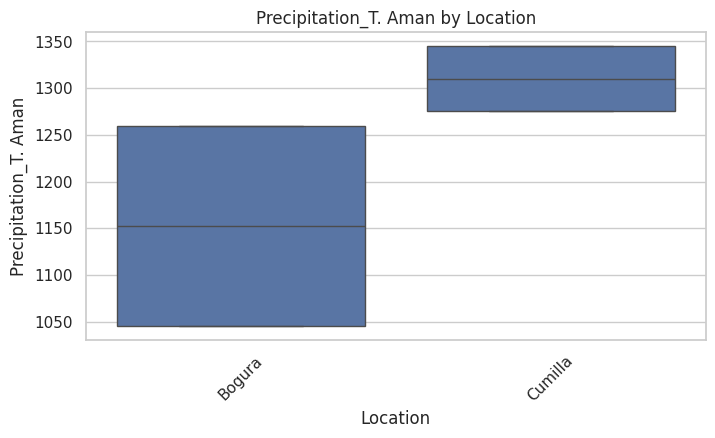

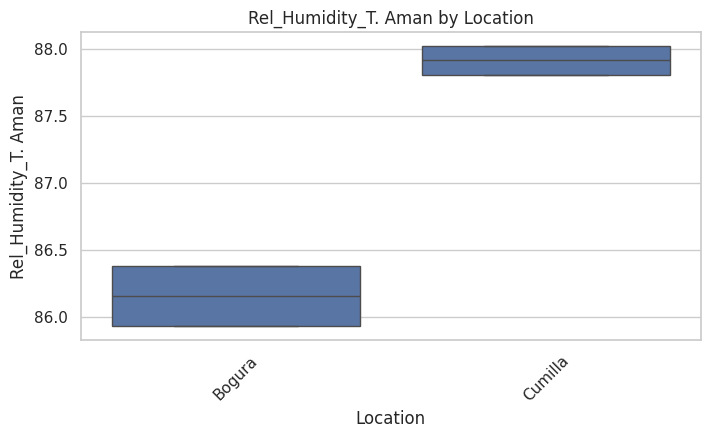

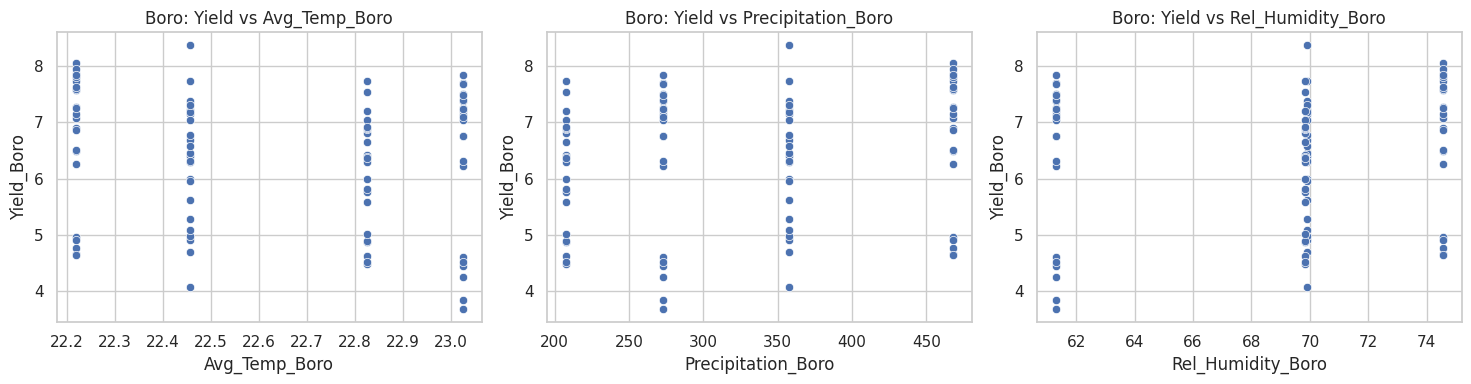

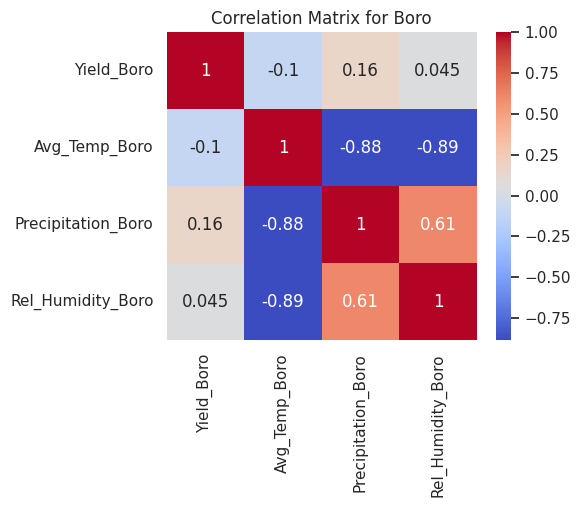

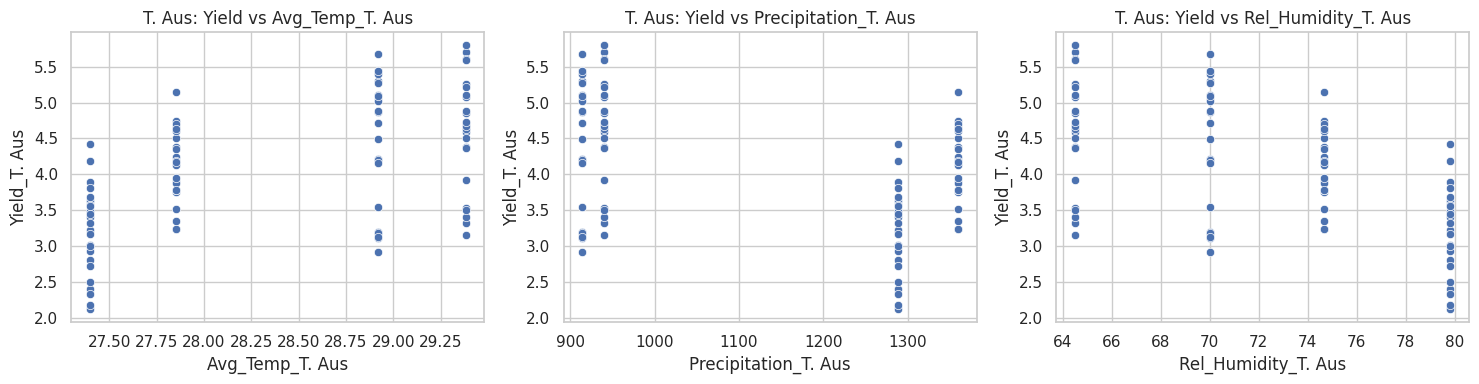

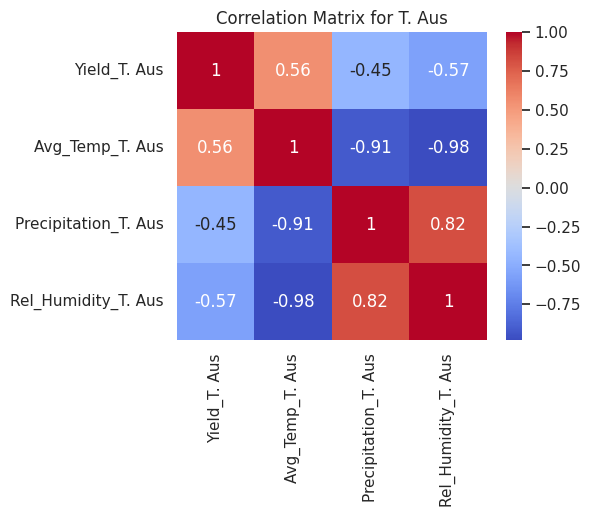

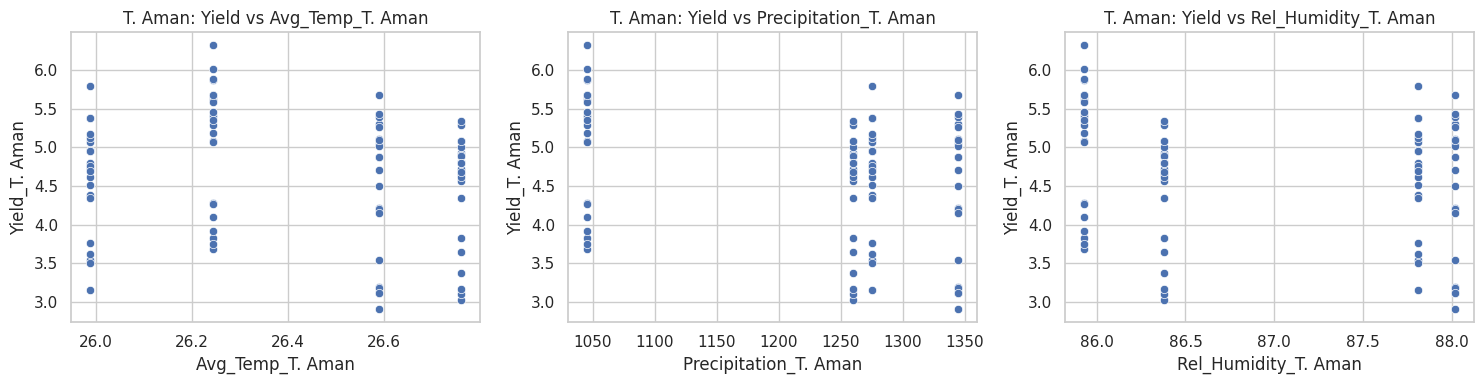

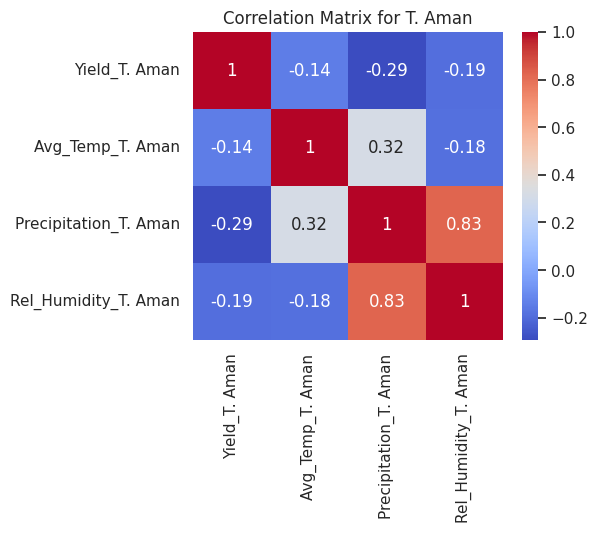

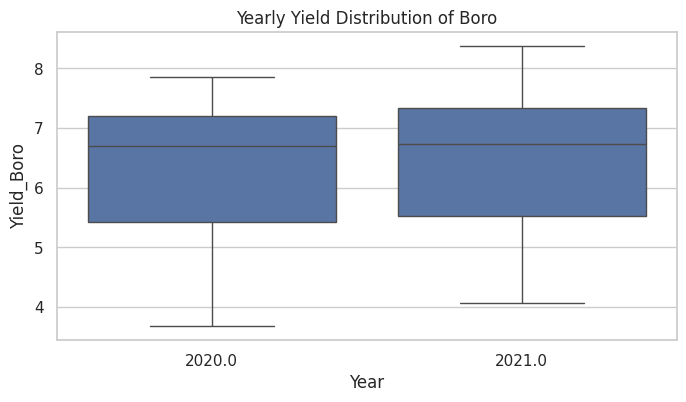

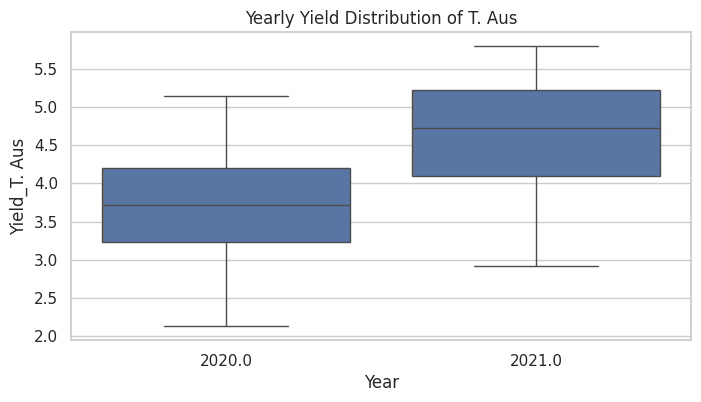

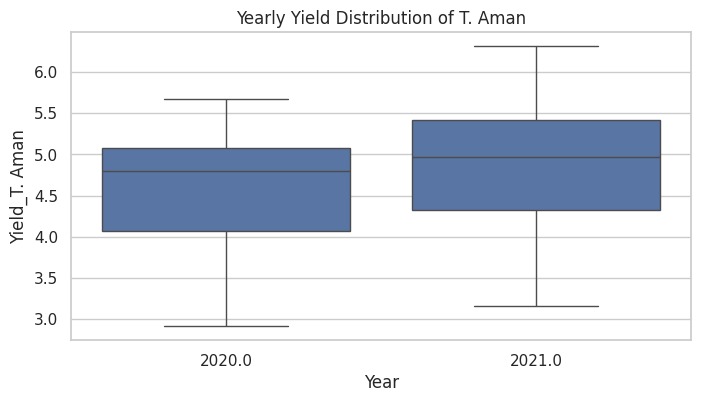

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                             Yield_Boro  Yield_T. Aus  Yield_T. Aman
Yield_Boro                     1.000000      0.660737       0.774369
N Removal_Boro                 0.926218      0.652343       0.792085
N Balance.4_Annual             0.925910      0.730184       0.826054
N Fertilizer_T. Aman           0.921343      0.759111       0.841038
N input.1_Boro                 0.916889      0.599926       0.806245
...                                 ...           ...            ...
S Rainfall_Boro               -0.138307     -0.326085       0.108061
NH3 Emission Factor_AmanVEF   -0.162220      0.301547       0.461587
BNF_Boro                            NaN           NaN            NaN
BNF_T. Aus                          NaN           NaN            NaN
BNF_T. Aman                         NaN           NaN            NaN

[132 rows x 3 columns]


In [2]:
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load weather data Excel with multiple sheets and combine into one DataFrame
weather_file = '/content/Crop_Weather_Data_2020_2021_final.xlsx'
xls = pd.ExcelFile(weather_file)
df_weather = pd.DataFrame()
for sheet in xls.sheet_names:
    df = xls.parse(sheet)
    crop, location, year = sheet.split('_')
    df['Crop'] = crop
    df['Location'] = location
    df['Year'] = int(year)
    df_weather = pd.concat([df_weather, df], ignore_index=True)

# Aggregate weather data by crop, location, and year with mean or sum
weather_agg = df_weather.groupby(['Crop', 'Location', 'Year']).agg({
    'Avg Temperature (°C)': 'mean',
    'Precipitation (mm)': 'sum',
    'Relative Humidity (%)': 'mean'
}).reset_index()

# Load your original crop dataset
crop_file = '/content/newProcessed_Dataset.xlsx'
df_crop = pd.read_excel(crop_file)

# Mapping crop keys to your dataset naming
crop_map = {
    'Boro': 'Boro',
    'T.Aus': 'T. Aus',
    'T.Aman': 'T. Aman'
}

# Merge weather features for each crop into your dataset
for crop_key, crop_col_suffix in crop_map.items():
    weather_sub = weather_agg[weather_agg['Crop'] == crop_key].copy()
    weather_sub = weather_sub.rename(columns={
        'Avg Temperature (°C)': f'Avg_Temp_{crop_col_suffix}',
        'Precipitation (mm)': f'Precipitation_{crop_col_suffix}',
        'Relative Humidity (%)': f'Rel_Humidity_{crop_col_suffix}'
    })
    df_crop = pd.merge(df_crop, weather_sub[['Location', 'Year', f'Avg_Temp_{crop_col_suffix}',
                                             f'Precipitation_{crop_col_suffix}', f'Rel_Humidity_{crop_col_suffix}']],
                       how='left', left_on=['Location', 'Year'], right_on=['Location', 'Year'])

# Save the merged dataset
df_crop.to_excel('/content/Merged_Crop_Weather_Data.xlsx', index=False)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 2. Full EDA including Residue/Treatment yield comparisons
def perform_eda(df):
    yield_cols = ['Yield_Boro', 'Yield_T. Aus', 'Yield_T. Aman']
    # ensure numeric safety
    for c in yield_cols:
        df[c] = pd.to_numeric(df[c], errors='coerce')

    ## 2.a Histogram of all yields
    plt.figure()
    for c in yield_cols:
        vals = df[c].dropna()
        if not vals.empty:
            plt.hist(vals, bins=20, alpha=0.6, label=c)
    plt.title('Yield Distributions')
    plt.xlabel('Yield')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

    ## 2.b Boxplot of yields by Location
    if 'Location' in df.columns:
        df['Location'] = df['Location'].astype(str)
        plt.figure()
        df.boxplot(column=yield_cols, by='Location', rot=45)
        plt.title('Yield by Location')
        plt.suptitle('')
        plt.ylabel('Yield')
        plt.show()

    ## 2.c Boxplot of yields by Year
    if 'Year' in df.columns:
        df['Year'] = df['Year'].astype(str)
        plt.figure()
        df.boxplot(column=yield_cols, by='Year', rot=45)
        plt.title('Yield by Year')
        plt.suptitle('')
        plt.ylabel('Yield')
        plt.show()

    ## 2.d Boxplot of yields by Residue
    if 'Residue' in df.columns:
        df['Residue'] = df['Residue'].astype(str)
        plt.figure()
        df.boxplot(column=yield_cols, by='Residue', rot=45)
        plt.title('Yield by Residue')
        plt.suptitle('')
        plt.ylabel('Yield')
        plt.show()

    ## 2.e Boxplot of yields by Treatment
    if 'Treatment' in df.columns:
        df['Treatment'] = df['Treatment'].astype(str)
        plt.figure()
        df.boxplot(column=yield_cols, by='Treatment', rot=45)
        plt.title('Yield by Treatment')
        plt.suptitle('')
        plt.ylabel('Yield')
        plt.show()

# Load the merged dataset which was saved in the previous cell
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# Perform EDA on the loaded dataframe
perform_eda(df)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# Set plot style
sns.set(style="whitegrid")

# 1. Histogram of crop yield distributions
crops = ['Boro', 'T. Aus', 'T. Aman']
for crop in crops:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[f'Yield_{crop}'], kde=True, bins=30)
    plt.title(f'Yield Distribution of {crop}')
    plt.xlabel('Yield')
    plt.ylabel('Count')
    plt.show()

# 2. Boxplot of weather features by location (per crop)
weather_features = [
    'Avg_Temp_Boro', 'Precipitation_Boro', 'Rel_Humidity_Boro',
    'Avg_Temp_T. Aus', 'Precipitation_T. Aus', 'Rel_Humidity_T. Aus',
    'Avg_Temp_T. Aman', 'Precipitation_T. Aman', 'Rel_Humidity_T. Aman'
]

for feature in weather_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Location', y=feature, data=df)
    plt.title(f'{feature} by Location')
    plt.xticks(rotation=45)
    plt.show()

# 3. Scatter plots of yield vs weather features and correlation heatmaps per crop
for crop in crops:
    features = [f'Avg_Temp_{crop}', f'Precipitation_{crop}', f'Rel_Humidity_{crop}']
    plt.figure(figsize=(15, 4))
    for i, feat in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(x=df[feat], y=df[f'Yield_{crop}'])
        plt.xlabel(feat)
        plt.ylabel(f'Yield_{crop}')
        plt.title(f'{crop}: Yield vs {feat}')
    plt.tight_layout()
    plt.show()

    # Correlation matrix heatmap
    corr_data = df[[f'Yield_{crop}'] + features]
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {crop}')
    plt.show()

# 4. Boxplots of yield distribution by year
for crop in crops:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Year', y=f'Yield_{crop}', data=df)
    plt.title(f'Yearly Yield Distribution of {crop}')
    plt.show()



import pandas as pd

# 1. Load data and compute correlations (reuse previous steps)
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
yield_targets = [col for col in numeric_columns if col.startswith('Yield_')]

correlation_df = pd.DataFrame({
    y: df[numeric_columns].corrwith(df[y])
    for y in yield_targets
}).drop(index=yield_targets, errors='ignore').round(3)

# 2. Define threshold for feature inclusion (e.g., |r| >= 0.5 for moderate or stronger)
threshold = 0.5

# 3. Select features for each yield target
selected_features = {
    target: correlation_df.index[correlation_df[target].abs() >= threshold].tolist()
    for target in yield_targets
}

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged dataset
df_crop = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# Select only numeric columns for correlation calculation
# Exclude non-numeric columns like 'Location', 'Residue', 'Treatment'
numeric_df_crop = df_crop.select_dtypes(include=np.number)

# Calculate the correlation matrix on the numeric data
corr_matrix = numeric_df_crop.corr()

# Assuming 'Year' might be treated as numeric but is categorical for analysis purposes
# You might want to drop 'Year' from correlation if it's not relevant as a continuous variable
# corr_matrix = numeric_df_crop.drop(columns=['Year']).corr()


print(corr_matrix[['Yield_Boro', 'Yield_T. Aus', 'Yield_T. Aman']].sort_values(by='Yield_Boro', ascending=False))

cols_to_check = ['Yield_Boro', 'Avg_Temp_Boro', 'Precipitation_Boro', 'Rel_Humidity_Boro']
df_crop_clean = df_crop.dropna(subset=cols_to_check)

Training models for Boro

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

# 1. Load data
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# 2. Define target and input features for Boro
target = 'Yield_Boro'

nutrient_feats = [
    'N Rainfall_Boro',
    'P Rainfall_Boro',
    'N Fertilizer_Boro',
    'P fertilizer_Boro',
    'K Fertilizer_Boro',
    'S Fertilizer_Boro',
    'K Rainfall_Boro',
    'S Rainfall_Boro',
    'S irrigation_Boro',
    'K irrigation_Boro',
    'N irrigation_Boro',
    'P irrigation_Boro',
    'BNF_Boro'
]

weather_feats = [
    'Avg_Temp_Boro',
    'Precipitation_Boro',
    'Rel_Humidity_Boro'
]

# optional metadata
meta_feats = ['Location', 'Treatment']

# 3. Subset and drop missing
cols = nutrient_feats + weather_feats + meta_feats + [target]
df_model = df[cols].dropna()

X = df_model[nutrient_feats + weather_feats + meta_feats]
y = df_model[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Build preprocessing pipeline
num_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,
                                 interaction_only=True,
                                 include_bias=False))
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, nutrient_feats + weather_feats),
    ('cat', OneHotEncoder(drop=None, handle_unknown='ignore', sparse_output=False)
, meta_feats)
], remainder='drop')

# 6. Define models and hyperparameter grids
models = {
    'LinearRegression': LinearRegression(),
    'Ridge'           : Ridge(random_state=42),
    'Lasso'           : Lasso(random_state=42),
    'RandomForest'    : RandomForestRegressor(random_state=42),
    'GBM'             : GradientBoostingRegressor(random_state=42),
    'XGBoost'         : XGBRegressor(random_state=42, use_label_encoder=False, verbosity=0),
    'SVR'             : SVR(kernel='rbf'),
    'KNN'             : KNeighborsRegressor()
}
print("Baseline performance (no tuning):")
for name, estimator in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', estimator)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2   = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    print(f"{name:15s} → R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}")

param_grids = {
    'LinearRegression': {},
    'Ridge'           : {'model__alpha': [0.1, 1, 10, 100]},
    'Lasso'           : {'model__alpha': [1e-4, 1e-3, 1e-2, 0.1, 1.0]},
    'RandomForest'    : {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth'   : [None, 10, 20],
        'model__max_features' : ['sqrt', 'log2']
    },
    'GBM'             : {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    },
    'XGBoost'         : {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    },
    'SVR'             : {'model__C': [0.1, 1, 10]},
    'KNN'             : {
        'model__n_neighbors': [3, 5, 7],
        'model__weights'    : ['uniform', 'distance']
    }
}
print("\nTuned performance (with GridSearchCV):")
# 7. Fit & evaluate with GridSearchCV
best_rmse = np.inf
best_pipeline = None

print("Model performance on Boro (R2, RMSE, MAE):")
for name, estimator in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', estimator)
    ])
    grid = GridSearchCV(
        pipe,
        param_grid = param_grids[name],
        cv         = 5,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = -1
    )
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)
    r2   = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    print(f"{name:15s} → R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}")
    if rmse < best_rmse:
        best_rmse     = rmse
        best_pipeline = grid.best_estimator_

# 8. Save best pipeline
joblib.dump(best_pipeline, "boro_best_pipeline.pkl")
print(f"\nBest pipeline saved with RMSE={best_rmse:.3f}")

Baseline performance (no tuning):
LinearRegression → R2=0.878, RMSE=0.422, MAE=0.325
Ridge           → R2=0.870, RMSE=0.436, MAE=0.337
Lasso           → R2=-0.000, RMSE=1.210, MAE=1.015
RandomForest    → R2=0.835, RMSE=0.491, MAE=0.387
GBM             → R2=0.759, RMSE=0.594, MAE=0.440
XGBoost         → R2=0.712, RMSE=0.649, MAE=0.508
SVR             → R2=0.866, RMSE=0.443, MAE=0.343
KNN             → R2=0.785, RMSE=0.561, MAE=0.447

Tuned performance (with GridSearchCV):
Model performance on Boro (R2, RMSE, MAE):
LinearRegression → R2=0.878, RMSE=0.422, MAE=0.325
Ridge           → R2=0.866, RMSE=0.442, MAE=0.353
Lasso           → R2=0.870, RMSE=0.436, MAE=0.344
RandomForest    → R2=0.834, RMSE=0.493, MAE=0.384
GBM             → R2=0.829, RMSE=0.500, MAE=0.407
XGBoost         → R2=0.718, RMSE=0.643, MAE=0.493
SVR             → R2=0.866, RMSE=0.442, MAE=0.311
KNN             → R2=0.784, RMSE=0.563, MAE=0.440

Best pipeline saved with RMSE=0.422


Top5 feature importance of Boro

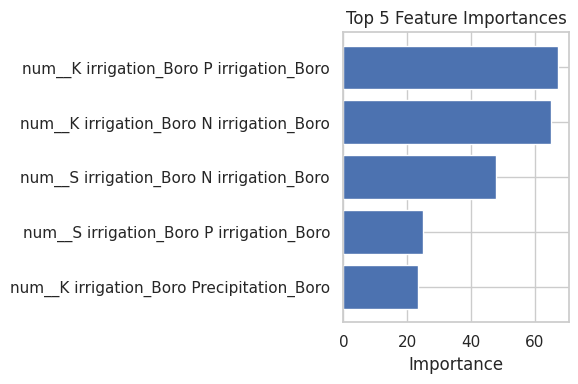

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
import joblib
from sklearn.model_selection import train_test_split

# Load the best Boro pipeline
best_boro_pipe = joblib.load('boro_best_pipeline.pkl')

# Load the data and split specifically for the Boro model
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# Define target and input features for Boro (must match the pipeline)
target = 'Yield_Boro'
nutrient_feats = [
    'N Rainfall_Boro',
    'P Rainfall_Boro',
    'N Fertilizer_Boro',
    'P fertilizer_Boro',
    'K Fertilizer_Boro',
    'S Fertilizer_Boro',
    'K Rainfall_Boro',
    'S Rainfall_Boro',
    'S irrigation_Boro',
    'K irrigation_Boro',
    'N irrigation_Boro',
    'P irrigation_Boro',
    'BNF_Boro'
]
weather_feats = [
    'Avg_Temp_Boro',
    'Precipitation_Boro',
    'Rel_Humidity_Boro'
]
meta_feats = ['Location', 'Treatment'] # These must also match

cols = nutrient_feats + weather_feats + meta_feats + [target]
df_model = df[cols].dropna()
X = df_model[nutrient_feats + weather_feats + meta_feats]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 1. Obtain the preprocessor and the model.
pre = best_boro_pipe.named_steps['pre']
mod = best_boro_pipe.named_steps['model']

# 2. Extract the names of the transformed features
try:
    feat_names = pre.get_feature_names_out()
except AttributeError:
    feat_names = []
    for name, trans, cols in pre.transformers_:
        if hasattr(trans, "get_feature_names_out"):
            feat_names += list(trans.get_feature_names_out(cols))
        else:
            feat_names += cols

# 3. The importance of calculation
if hasattr(mod, "feature_importances_"):
    imps = mod.feature_importances_
else:
    # Need X_test here to perform permutation importance
    # Assumes X_test is available in the environment or loaded from a file
    # If X_test is not available, you would need to load it
    # For now, assuming X_test is available from previous cell executions
    X_test_proc = pre.transform(X_test)
    perm = permutation_importance(mod, X_test_proc, y_test,
                                  n_repeats=10, random_state=42,
                                  scoring='r2', n_jobs=-1)
    imps = perm.importances_mean

# 4. Build Series and get Top-5
imp_ser = pd.Series(imps, index=feat_names).sort_values(ascending=False)
top5    = imp_ser.head(5)

# 5. Create bar chart
plt.figure(figsize=(6, 4))
plt.barh(top5.index[::-1], top5.values[::-1])
plt.xlabel("Importance")
plt.title("Top 5 Feature Importances")
plt.tight_layout()
plt.show()

Residual Plots of Boro

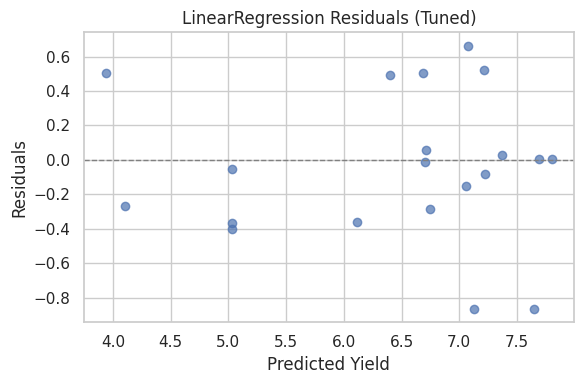

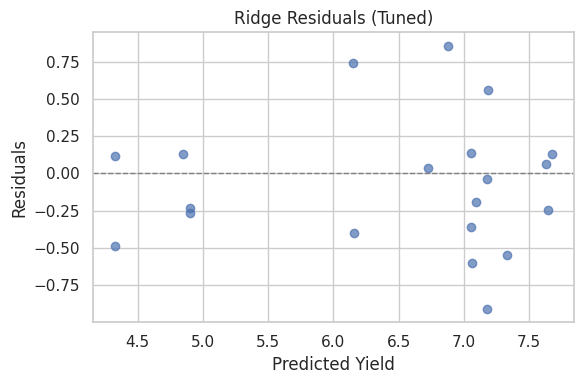

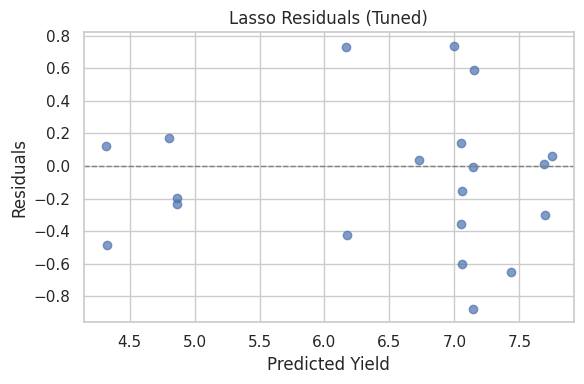

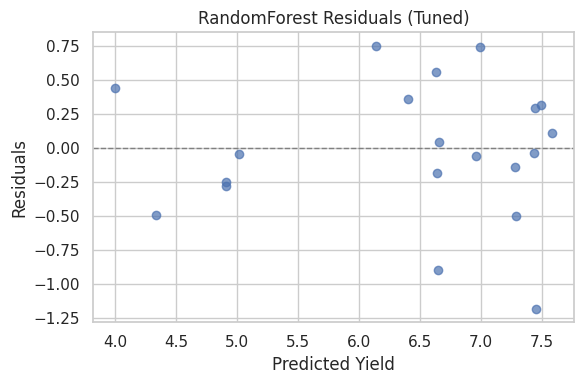

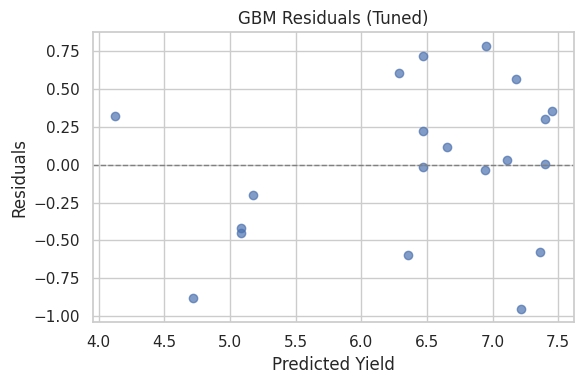

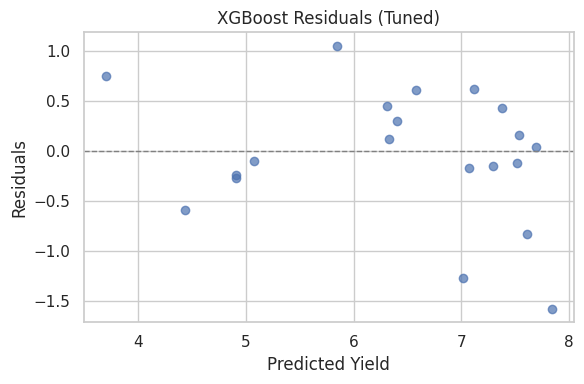

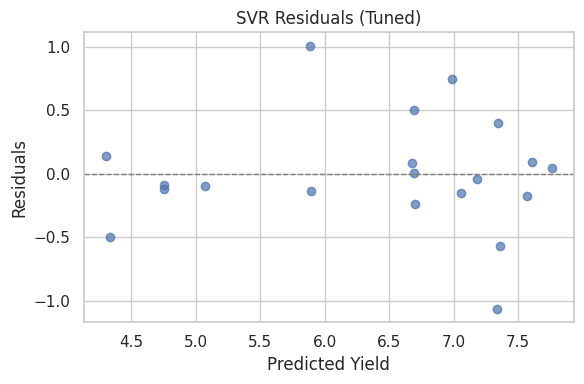

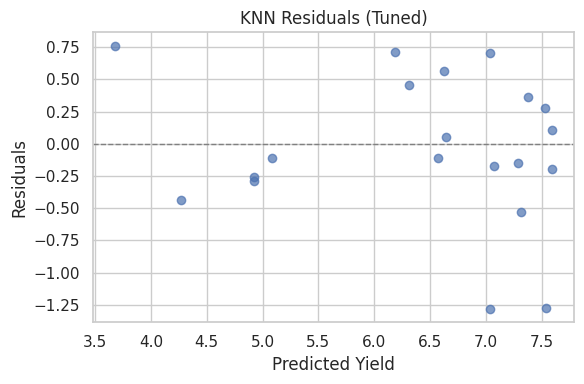

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Load the best Boro pipeline
best_boro_pipe = joblib.load('boro_best_pipeline.pkl')

# Load the data and split specifically for the Boro model
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# Define target and input features for Boro (must match the pipeline from cell 9FQMabE1ZGim)
target = 'Yield_Boro'
nutrient_feats = [
    'N Rainfall_Boro',
    'P Rainfall_Boro',
    'N Fertilizer_Boro',
    'P fertilizer_Boro',
    'K Fertilizer_Boro',
    'S Fertilizer_Boro',
    'K Rainfall_Boro',
    'S Rainfall_Boro',
    'S irrigation_Boro',
    'K irrigation_Boro',
    'N irrigation_Boro',
    'P irrigation_Boro',
    'BNF_Boro'
]
weather_feats = [
    'Avg_Temp_Boro',
    'Precipitation_Boro',
    'Rel_Humidity_Boro'
]
meta_feats = ['Location', 'Treatment'] # These must also match

# Include all features used in the preprocessor for Boro model in df_model
all_features_boro = nutrient_feats + weather_feats + meta_feats
cols = all_features_boro + [target]
df_model = df[cols].dropna(subset=all_features_boro) # Drop rows with NaNs in features used for modeling

X = df_model[all_features_boro]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-define the preprocessor and models/param_grids as they are needed for plotting
# This should match the definition in cell 9FQMabE1ZGim
num_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,
                                 interaction_only=True,
                                 include_bias=False))
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, nutrient_feats + weather_feats),
    ('cat', OneHotEncoder(drop=None, handle_unknown='ignore', sparse_output=False)
, meta_feats)
], remainder='drop')

models = {
    'LinearRegression': LinearRegression(),
    'Ridge'           : Ridge(random_state=42),
    'Lasso'           : Lasso(random_state=42),
    'RandomForest'    : RandomForestRegressor(random_state=42),
    'GBM'             : GradientBoostingRegressor(random_state=42),
    'XGBoost'         : XGBRegressor(random_state=42, use_label_encoder=False, verbosity=0),
    'SVR'             : SVR(kernel='rbf'),
    'KNN'             : KNeighborsRegressor()
}

param_grids = {
    'LinearRegression': {},
    'Ridge'           : {'model__alpha': [0.1, 1, 10, 100]},
    'Lasso'           : {'model__alpha': [1e-4, 1e-3, 1e-2, 0.1, 1.0]},
    'RandomForest'    : {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth'   : [None, 10, 20],
        'model__max_features' : ['sqrt', 'log2']
    },
    'GBM'             : {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    },
    'XGBoost'         : {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    },
    'SVR'             : {'model__C': [0.1, 1, 10]},
    'KNN'             : {
        'model__n_neighbors': [3, 5, 7],
        'model__weights'    : ['uniform', 'distance']
    }
}

# 1. Re-run GridSearchCV to collect each model's best pipeline
best_estimators = {}
for name, estimator in models.items():
    pipe = Pipeline([('pre', preprocessor), ('model', estimator)])
    grid = GridSearchCV(
        pipe,
        param_grid  = param_grids[name],
        cv          = 5,
        scoring     = 'neg_root_mean_squared_error',
        n_jobs      = -1
    )
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_


# 3. Function to plot residuals
def plot_residuals(pipelines_dict, title_suffix):
    for name, pipe in pipelines_dict.items():
        y_pred = pipe.predict(X_test)
        residuals = y_test - y_pred

        plt.figure(figsize=(6, 4))
        plt.scatter(y_pred, residuals, alpha=0.7)
        plt.axhline(0, color='gray', linestyle='--', linewidth=1)
        plt.title(f"{name} Residuals ({title_suffix})")
        plt.xlabel("Predicted Yield")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.show()

# 4. Execute plotting
plot_residuals(best_estimators, 'Tuned')

Correlation heatmap of Boro

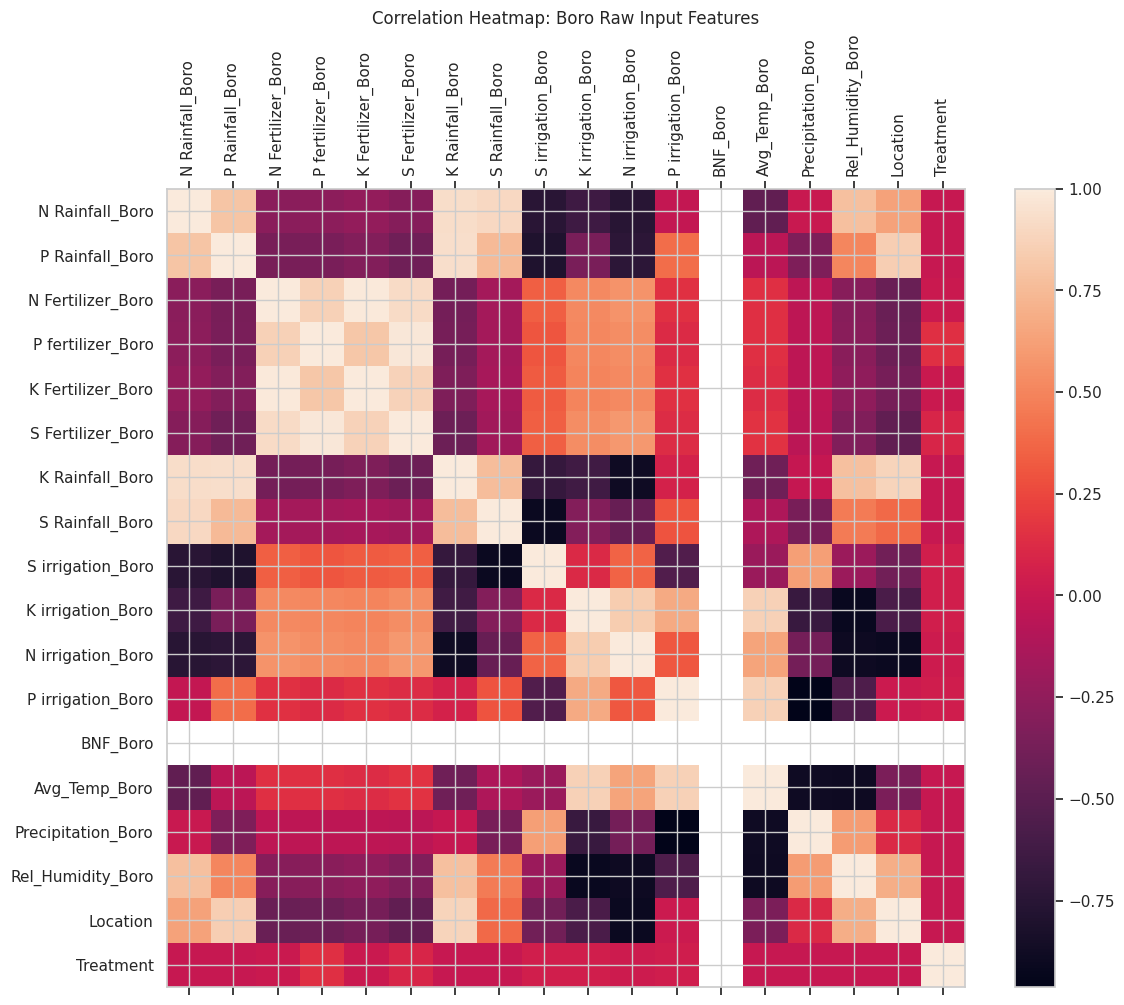

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the processed dataset
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# 2. Define Boro features and target
nutrient_feats = [
    'N Rainfall_Boro',
    'P Rainfall_Boro',
    'N Fertilizer_Boro',
    'P fertilizer_Boro',
    'K Fertilizer_Boro',
    'S Fertilizer_Boro',
    'K Rainfall_Boro',
    'S Rainfall_Boro',
    'S irrigation_Boro',
    'K irrigation_Boro',
    'N irrigation_Boro',
    'P irrigation_Boro',
    'BNF_Boro'
]
weather_feats = ['Avg_Temp_Boro', 'Precipitation_Boro', 'Rel_Humidity_Boro']
meta_feats    = ['Location', 'Treatment']

# 3. Subset and drop missing
cols = nutrient_feats + weather_feats + meta_feats
df_sub = df[cols].dropna()

# 4. Encode categorical meta features as numeric codes
for col in meta_feats:
    df_sub[col] = pd.Categorical(df_sub[col]).codes

# 5. Compute correlation matrix
corr = df_sub.corr()

# 6. Plot heatmap
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr)
fig.colorbar(cax)
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=90)
ax.set_yticks(range(len(cols)))
ax.set_yticklabels(cols)
ax.set_title('Correlation Heatmap: Boro Raw Input Features')
plt.tight_layout()
plt.show()


Training models for T. Aus (Including top5 feature importance)

Baseline performance (no tuning):
LinearRegression → R2=0.654, RMSE=0.405, MAE=0.316
Ridge           → R2=0.733, RMSE=0.356, MAE=0.268
Lasso           → R2=-0.000, RMSE=0.689, MAE=0.623
RandomForest    → R2=0.818, RMSE=0.293, MAE=0.235
GBM             → R2=0.711, RMSE=0.370, MAE=0.305
XGBoost         → R2=0.710, RMSE=0.371, MAE=0.298
SVR             → R2=0.837, RMSE=0.278, MAE=0.228
KNN             → R2=0.687, RMSE=0.385, MAE=0.330

Tuned performance (with GridSearchCV):
Model performance on T. Aus (R2, RMSE, MAE):
LinearRegression → R2=0.654, RMSE=0.405, MAE=0.316
Ridge           → R2=0.606, RMSE=0.432, MAE=0.344
Lasso           → R2=0.811, RMSE=0.299, MAE=0.235
RandomForest    → R2=0.821, RMSE=0.292, MAE=0.226
GBM             → R2=0.798, RMSE=0.309, MAE=0.248
XGBoost         → R2=0.717, RMSE=0.366, MAE=0.292
SVR             → R2=0.837, RMSE=0.278, MAE=0.228
KNN             → R2=0.779, RMSE=0.323, MAE=0.250

Best pipeline saved for Yield_T. Aus with RMSE=0.278

Feature importances for

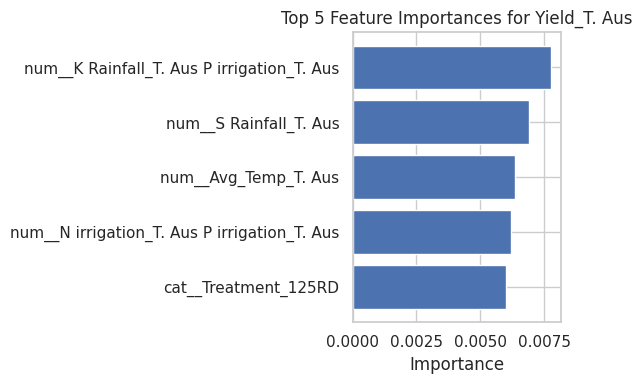


Residuals plot for the best model (SVR):


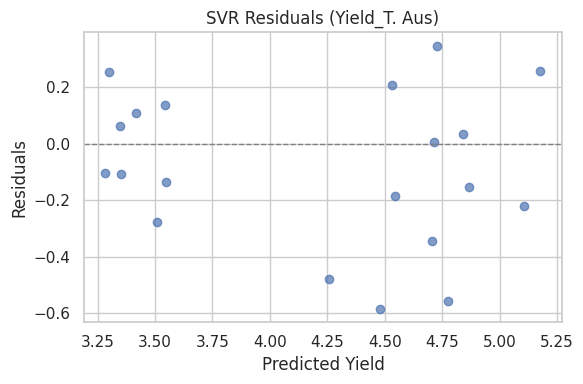

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 1. Load data
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# 2. Define target and input features for T. Aus
target = 'Yield_T. Aus'

nutrient_feats = [
    'N Rainfall_T. Aus',
    'P Rainfall_T. Aus',
    'N Fertilizer_T. Aus',
    'P fertilizer_T. Aus',
    'K Fertilizer_T. Aus',
    'S Fertilizer_T. Aus',
    'K Rainfall_T. Aus',
    'S Rainfall_T. Aus',
    'S irrigation_T. Aus',
    'K irrigation_T. Aus',
    'N irrigation_T. Aus',
    'P irrigation_T. Aus',
    'BNF_T. Aus'
]

weather_feats = [
    'Avg_Temp_T. Aus',
    'Precipitation_T. Aus',
    'Rel_Humidity_T. Aus'
]

# optional metadata
meta_feats = ['Location', 'Treatment']

# 3. Subset and drop missing
cols = nutrient_feats + weather_feats + meta_feats + [target]
df_model = df[cols].dropna()

X = df_model[nutrient_feats + weather_feats + meta_feats]
y = df_model[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Build preprocessing pipeline
num_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,
                                 interaction_only=True,
                                 include_bias=False))
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, nutrient_feats + weather_feats),
    ('cat', OneHotEncoder(drop=None, handle_unknown='ignore', sparse_output=False)
, meta_feats)
], remainder='drop')

# 6. Define models and hyperparameter grids
models = {
    'LinearRegression': LinearRegression(),
    'Ridge'           : Ridge(random_state=42),
    'Lasso'           : Lasso(random_state=42),
    'RandomForest'    : RandomForestRegressor(random_state=42),
    'GBM'             : GradientBoostingRegressor(random_state=42),
    'XGBoost'         : XGBRegressor(random_state=42, use_label_encoder=False, verbosity=0),
    'SVR'             : SVR(kernel='rbf'),
    'KNN'             : KNeighborsRegressor()
}
print("Baseline performance (no tuning):")
for name, estimator in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', estimator)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2   = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    print(f"{name:15s} → R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}")

param_grids = {
    'LinearRegression': {},
    'Ridge'           : {'model__alpha': [0.1, 1, 10, 100]},
    'Lasso'           : {'model__alpha': [1e-4, 1e-3, 1e-2, 0.1, 1.0]},
    'RandomForest'    : {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth'   : [None, 10, 20],
        'model__max_features' : ['sqrt', 'log2']
    },
    'GBM'             : {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    },
    'XGBoost'         : {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    },
    'SVR'             : {'model__C': [0.1, 1, 10]},
    'KNN'             : {
        'model__n_neighbors': [3, 5, 7],
        'model__weights'    : ['uniform', 'distance']
    }
}
print("\nTuned performance (with GridSearchCV):")
# 7. Fit & evaluate with GridSearchCV
best_rmse = np.inf
best_pipeline = None
best_model_name = None

print("Model performance on T. Aus (R2, RMSE, MAE):")
for name, estimator in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', estimator)
    ])
    grid = GridSearchCV(
        pipe,
        param_grid = param_grids[name],
        cv         = 5,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = -1
    )
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)
    r2   = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    print(f"{name:15s} → R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}")
    if rmse < best_rmse:
        best_rmse     = rmse
        best_pipeline = grid.best_estimator_
        best_model_name = name


# 8. Save best pipeline
joblib.dump(best_pipeline, "taus_best_pipeline.pkl")
print(f"\nBest pipeline saved for {target} with RMSE={best_rmse:.3f}")

# 9. Feature Importance (for tree-based models or permutation importance)
print(f"\nFeature importances for the best model ({best_model_name}):")
pre = best_pipeline.named_steps['pre']
mod = best_pipeline.named_steps['model']

try:
    feat_names = pre.get_feature_names_out()
except AttributeError:
    feat_names = []
    for name, trans, cols in pre.transformers_:
        if hasattr(trans, "get_feature_names_out"):
            feat_names += list(trans.get_feature_names_out(cols))
        else:
            feat_names += cols

if hasattr(mod, "feature_importances_"):
    imps = mod.feature_importances_
else:
    X_test_proc = pre.transform(X_test)
    perm = permutation_importance(mod, X_test_proc, y_test,
                                  n_repeats=10, random_state=42,
                                  scoring='r2', n_jobs=-1)
    imps = perm.importances_mean

imp_ser = pd.Series(imps, index=feat_names).sort_values(ascending=False)
top5    = imp_ser.head(5)

plt.figure(figsize=(6, 4))
plt.barh(top5.index[::-1], top5.values[::-1])
plt.xlabel("Importance")
plt.title(f"Top 5 Feature Importances for {target}")
plt.tight_layout()
plt.show()

# 10. Plot Residuals
print(f"\nResiduals plot for the best model ({best_model_name}):")
y_pred = best_pipeline.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(f"{best_model_name} Residuals ({target})")
plt.xlabel("Predicted Yield")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

Residual Plots of T. Aus

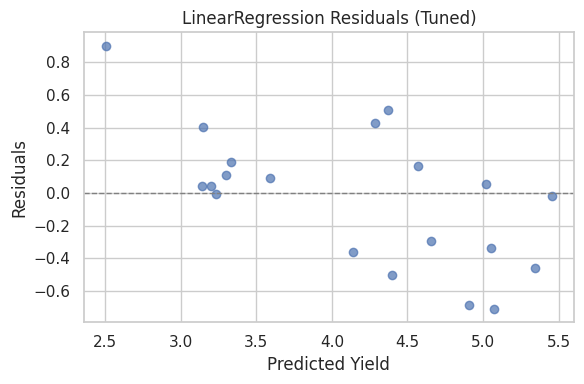

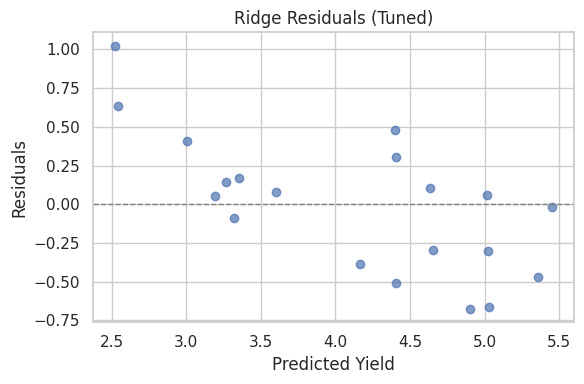

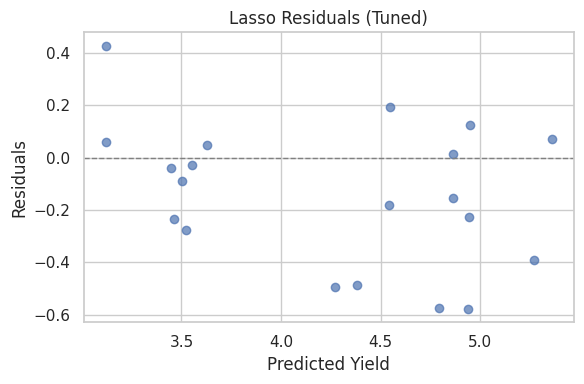

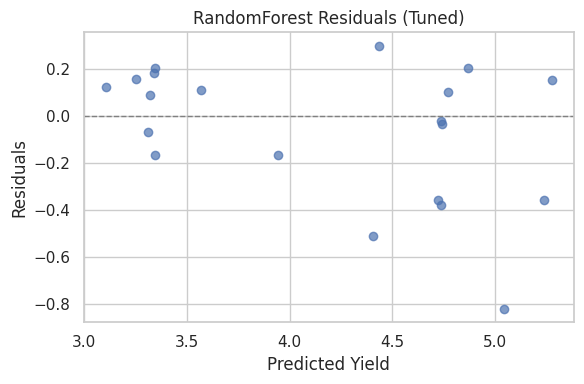

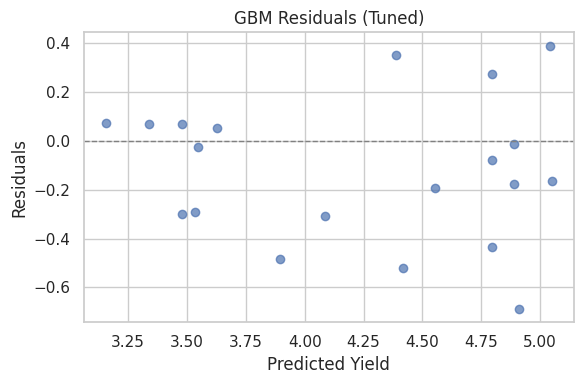

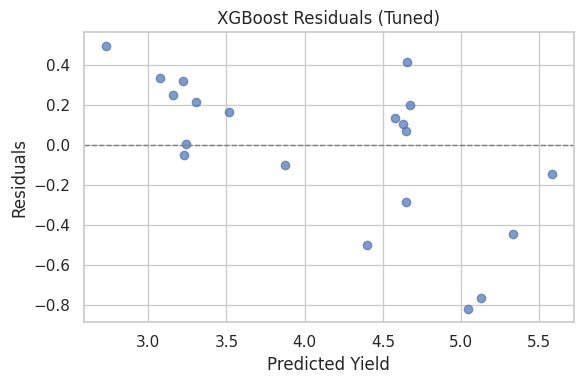

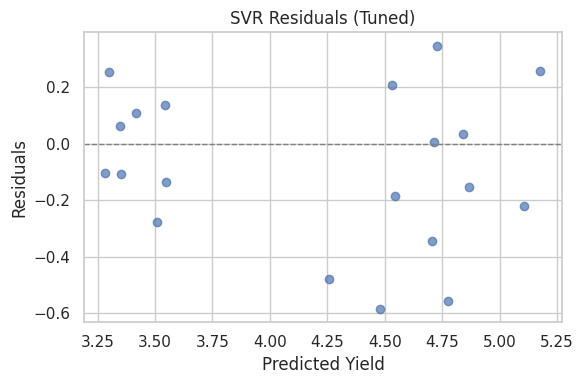

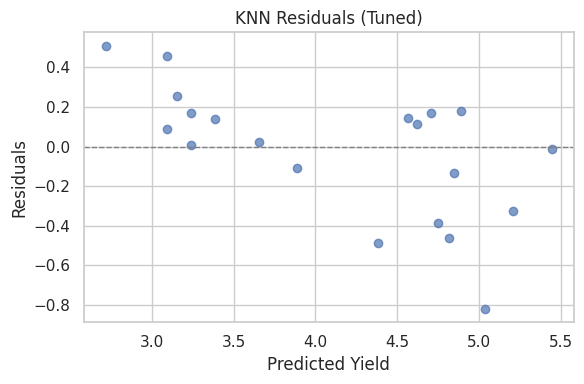

In [8]:
import matplotlib.pyplot as plt


# 1. Best pipeline
best_estimators = {}
for name, estimator in models.items():
    pipe = Pipeline([('pre', preprocessor), ('model', estimator)])
    grid = GridSearchCV(
        pipe,
        param_grid  = param_grids[name],
        cv          = 5,
        scoring     = 'neg_root_mean_squared_error',
        n_jobs      = -1
    )
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_


# 3. Residual Plots
def plot_residuals(pipelines_dict, title_suffix):
    for name, pipe in pipelines_dict.items():
        y_pred = pipe.predict(X_test)
        residuals = y_test - y_pred

        plt.figure(figsize=(6, 4))
        plt.scatter(y_pred, residuals, alpha=0.7)
        plt.axhline(0, color='gray', linestyle='--', linewidth=1)
        plt.title(f"{name} Residuals ({title_suffix})")
        plt.xlabel("Predicted Yield")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.show()

# 4. Get results
plot_residuals(best_estimators, 'Tuned')

Correlation Heatmap of T. Aus

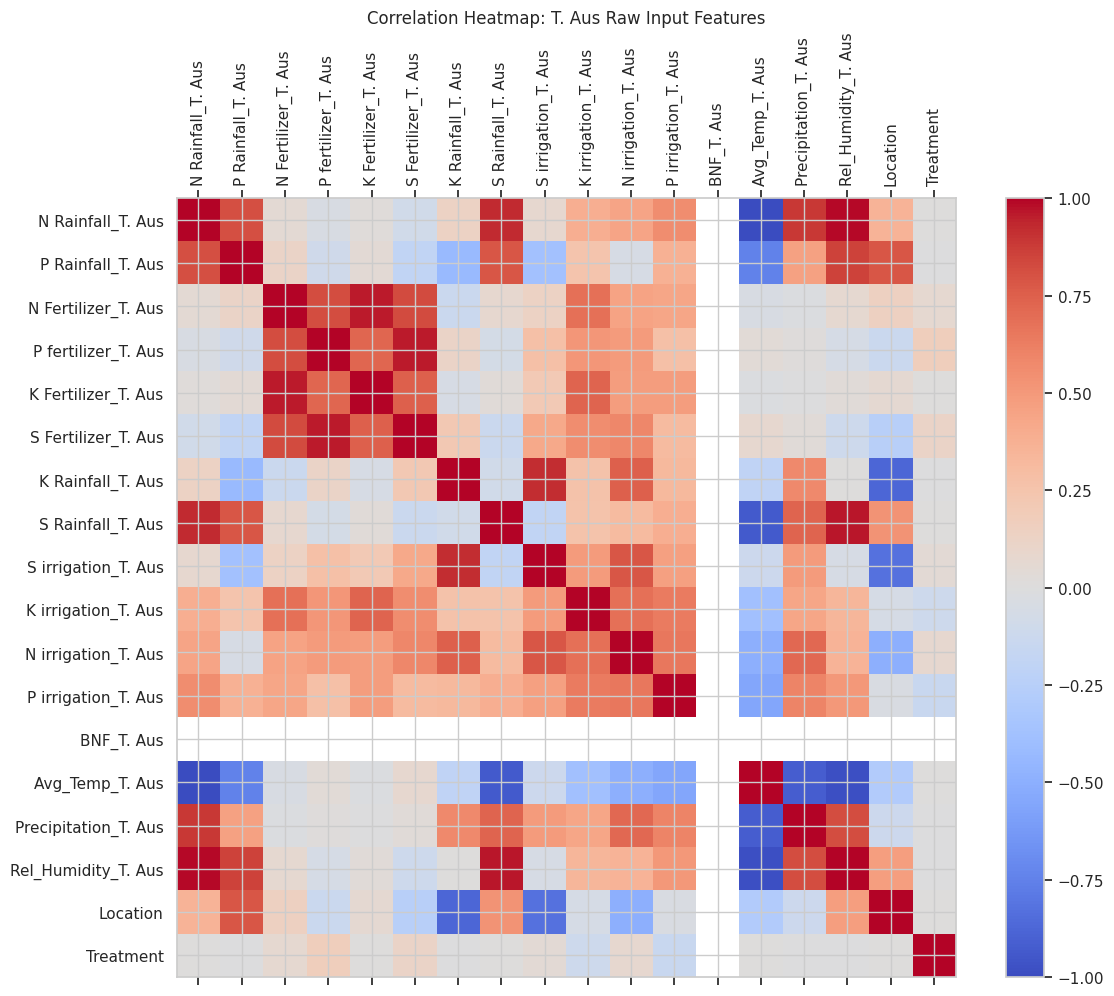

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the processed dataset
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# 2. Define T. Aus features and target
nutrient_feats = [
    'N Rainfall_T. Aus',
    'P Rainfall_T. Aus',
    'N Fertilizer_T. Aus',
    'P fertilizer_T. Aus',
    'K Fertilizer_T. Aus',
    'S Fertilizer_T. Aus',
    'K Rainfall_T. Aus',
    'S Rainfall_T. Aus',
    'S irrigation_T. Aus',
    'K irrigation_T. Aus',
    'N irrigation_T. Aus',
    'P irrigation_T. Aus',
    'BNF_T. Aus'
]
weather_feats = [
    'Avg_Temp_T. Aus',
    'Precipitation_T. Aus',
    'Rel_Humidity_T. Aus'
]
meta_feats = ['Location', 'Treatment']

# 3. Subset and drop missing
cols = nutrient_feats + weather_feats + meta_feats
df_sub = df[cols].dropna()

# 4. Encode categorical meta features as numeric codes
for col in meta_feats:
    df_sub[col] = pd.Categorical(df_sub[col]).codes

# 5. Compute correlation matrix
corr = df_sub.corr()

# 6. Plot heatmap
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=90)
ax.set_yticks(range(len(cols)))
ax.set_yticklabels(cols)
ax.set_title('Correlation Heatmap: T. Aus Raw Input Features')
plt.tight_layout()
plt.show()


Training models for T. Aman

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

# 1. Load data
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# 2. Define target and input features for T. Aman
target = 'Yield_T. Aman'

nutrient_feats = [
    'N Rainfall_T. Aman',
    'P Rainfall_T. Aman',
    'N Fertilizer_T. Aman',
    'P fertilizer_T. Aman',
    'K Fertilizer_T. Aman',
    'S Fertilizer_T. Aman',
    'K Rainfall_T. Aman',
    'S Rainfall_T. Aman',
    'S irrigation_T. Aman',
    'K irrigation_T. Aman',
    'N irrigation_T. Aman',
    'P irrigation_T. Aman',
    'BNF_T. Aman'
]

weather_feats = [
    'Avg_Temp_T. Aman',
    'Precipitation_T. Aman',
    'Rel_Humidity_T. Aman'
]

# optional metadata
meta_feats = ['Location', 'Treatment']

# 3. Subset and drop missing
cols = nutrient_feats + weather_feats + meta_feats + [target]
df_model = df[cols].dropna()

X = df_model[nutrient_feats + weather_feats + meta_feats]
y = df_model[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Build preprocessing pipeline
num_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,
                                 interaction_only=True,
                                 include_bias=False))
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, nutrient_feats + weather_feats),
    ('cat', OneHotEncoder(drop=None, handle_unknown='ignore', sparse_output=False)
, meta_feats)
], remainder='drop')

# 6. Define models and hyperparameter grids
models = {
    'LinearRegression': LinearRegression(),
    'Ridge'           : Ridge(random_state=42),
    'Lasso'           : Lasso(random_state=42),
    'RandomForest'    : RandomForestRegressor(random_state=42),
    'GBM'             : GradientBoostingRegressor(random_state=42),
    'XGBoost'         : XGBRegressor(random_state=42, use_label_encoder=False, verbosity=0),
    'SVR'             : SVR(kernel='rbf'),
    'KNN'             : KNeighborsRegressor()
}
print("Baseline performance (no tuning):")
for name, estimator in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', estimator)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2   = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    print(f"{name:15s} → R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}")
#

# 7. Fit & evaluate with GridSearchCV
best_rmse = np.inf
best_pipeline = None

print("Model performance on T. Aman (R2, RMSE, MAE):")
for name, estimator in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', estimator)
    ])
    grid = GridSearchCV(
        pipe,
        param_grid = param_grids[name],
        cv         = 5,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = -1
    )
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)
    r2   = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    print(f"{name:15s} → R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}")
    if rmse < best_rmse:
        best_rmse     = rmse
        best_pipeline = grid.best_estimator_

# 8. Save best pipeline
joblib.dump(best_pipeline, "taman_best_pipeline.pkl")
print(f"\nBest pipeline saved with RMSE={best_rmse:.3f}")

Baseline performance (no tuning):
LinearRegression → R2=0.629, RMSE=0.510, MAE=0.375
Ridge           → R2=0.530, RMSE=0.574, MAE=0.456
Lasso           → R2=-0.317, RMSE=0.960, MAE=0.854
RandomForest    → R2=0.620, RMSE=0.516, MAE=0.403
GBM             → R2=0.575, RMSE=0.546, MAE=0.435
XGBoost         → R2=0.575, RMSE=0.545, MAE=0.434
SVR             → R2=0.609, RMSE=0.523, MAE=0.425
KNN             → R2=0.502, RMSE=0.591, MAE=0.508
Model performance on T. Aman (R2, RMSE, MAE):
LinearRegression → R2=0.629, RMSE=0.510, MAE=0.375
Ridge           → R2=0.619, RMSE=0.517, MAE=0.396


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.843e-02, tolerance: 2.237e-03
  model = cd_fast.enet_coordinate_descent(


Lasso           → R2=0.595, RMSE=0.532, MAE=0.417
RandomForest    → R2=0.640, RMSE=0.502, MAE=0.392
GBM             → R2=0.575, RMSE=0.546, MAE=0.435
XGBoost         → R2=0.577, RMSE=0.544, MAE=0.434
SVR             → R2=0.650, RMSE=0.495, MAE=0.392
KNN             → R2=0.661, RMSE=0.487, MAE=0.373

Best pipeline saved with RMSE=0.487


Top5 feature importance of T. Aman

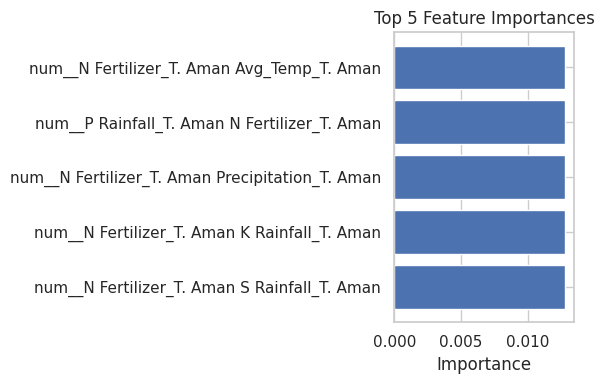

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import numpy as np

# Load the best T. Aman pipeline
best_taman_pipe = joblib.load('taman_best_pipeline.pkl')

# Load the data and define features and target for T. Aman (must match the pipeline from cell HxSj5rUAglRw)
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

target = 'Yield_T. Aman'

nutrient_feats = [
    'N Rainfall_T. Aman',
    'P Rainfall_T. Aman',
    'N Fertilizer_T. Aman',
    'P fertilizer_T. Aman',
    'K Fertilizer_T. Aman',
    'S Fertilizer_T. Aman',
    'K Rainfall_T. Aman',
    'S Rainfall_T. Aman',
    'S irrigation_T. Aman',
    'K irrigation_T. Aman',
    'N irrigation_T. Aman',
    'P irrigation_T. Aman',
    'BNF_T. Aman'
]

weather_feats = [
    'Avg_Temp_T. Aman',
    'Precipitation_T. Aman',
    'Rel_Humidity_T. Aman'
]

meta_feats = ['Location', 'Treatment']

# Subset and drop missing using the same feature list as in the training cell
cols = nutrient_feats + weather_feats + meta_feats + [target]
df_model = df[cols].dropna(subset=nutrient_feats + weather_feats + meta_feats)

X = df_model[nutrient_feats + weather_feats + meta_feats]
y = df_model[target]

# Train/test split (must match the split used for training the pipeline)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 1. preprocessor and model
pre = best_taman_pipe.named_steps['pre']
mod = best_taman_pipe.named_steps['model']

# 2. Get features names
try:
    feat_names = pre.get_feature_names_out()
except AttributeError:
    feat_names = []
    for name, trans, cols in pre.transformers_:
        if hasattr(trans, "get_feature_names_out"):
            feat_names += list(trans.get_feature_names_out(cols))
        else:
            feat_names += cols

# 3. Feature importances
if hasattr(mod, "feature_importances_"):
    imps = mod.feature_importances_
else:
    # Use the correctly subsetted X_test
    X_test_proc = pre.transform(X_test)
    perm = permutation_importance(mod, X_test_proc, y_test,
                                  n_repeats=10, random_state=42,
                                  scoring='r2', n_jobs=-1)
    imps = perm.importances_mean

# 4. Build series and get top5
imp_ser = pd.Series(imps, index=feat_names).sort_values(ascending=False)
top5    = imp_ser.head(5)

# 5. Bar chart
plt.figure(figsize=(6, 4))
plt.barh(top5.index[::-1], top5.values[::-1])
plt.xlabel("Importance")
plt.title("Top 5 Feature Importances")
plt.tight_layout()
plt.show()

Residual plots of T. Aman

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.843e-02, tolerance: 2.237e-03
  model = cd_fast.enet_coordinate_descent(


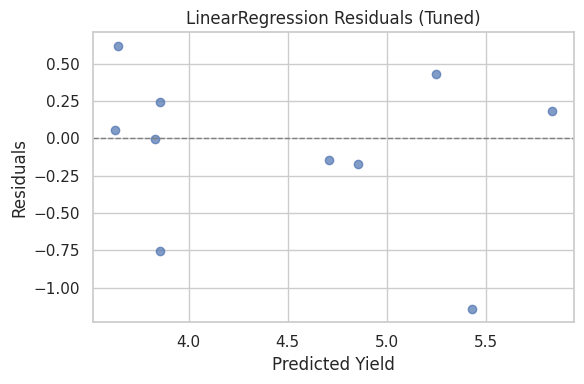

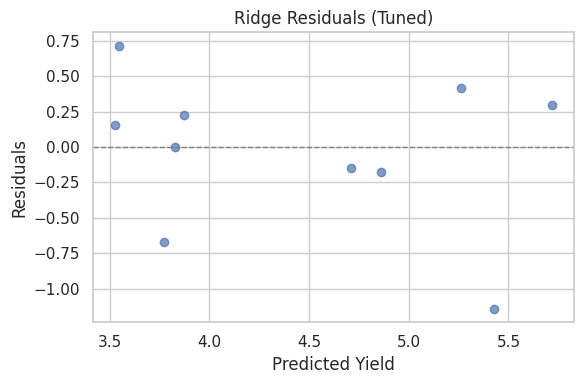

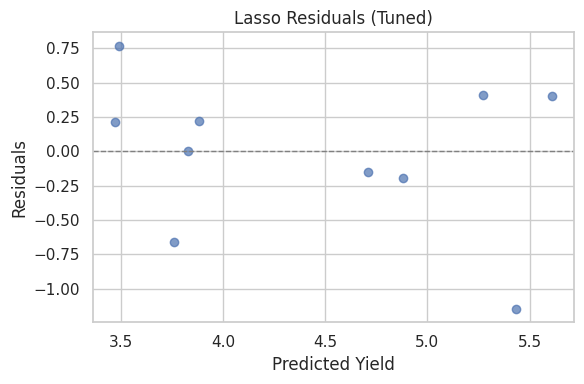

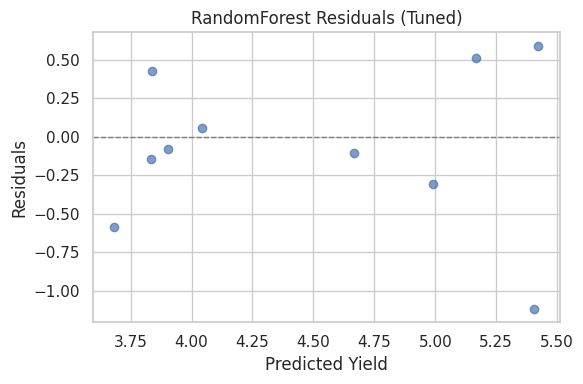

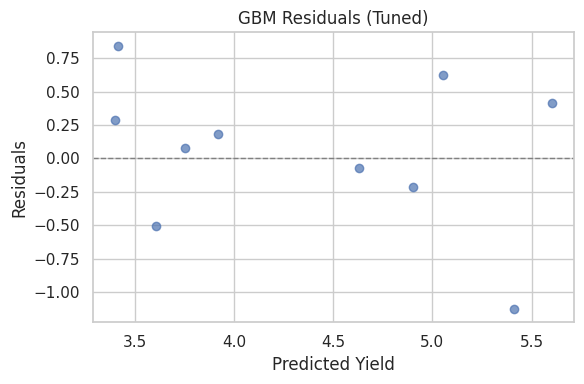

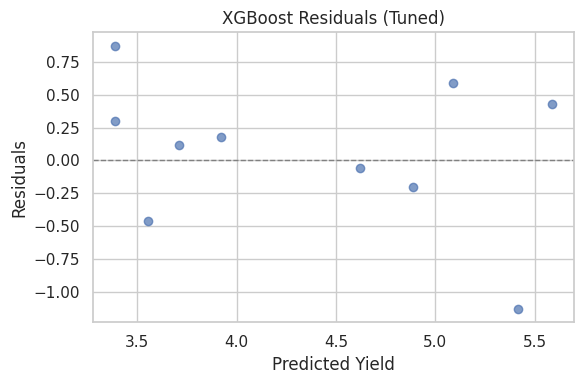

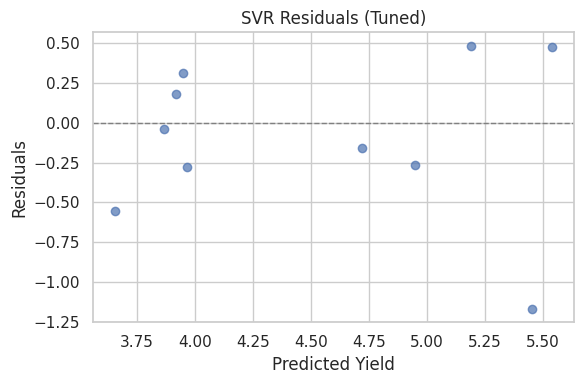

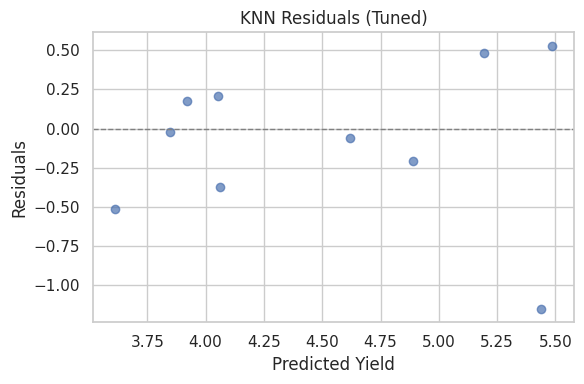

In [12]:
import matplotlib.pyplot as plt


# 1. Best pipeline
best_estimators = {}
for name, estimator in models.items():
    pipe = Pipeline([('pre', preprocessor), ('model', estimator)])
    grid = GridSearchCV(
        pipe,
        param_grid  = param_grids[name],
        cv          = 5,
        scoring     = 'neg_root_mean_squared_error',
        n_jobs      = -1
    )
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_


# 3. Residual plots
def plot_residuals(pipelines_dict, title_suffix):
    for name, pipe in pipelines_dict.items():
        y_pred = pipe.predict(X_test)
        residuals = y_test - y_pred

        plt.figure(figsize=(6, 4))
        plt.scatter(y_pred, residuals, alpha=0.7)
        plt.axhline(0, color='gray', linestyle='--', linewidth=1)
        plt.title(f"{name} Residuals ({title_suffix})")
        plt.xlabel("Predicted Yield")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.show()

# 4. Results
plot_residuals(best_estimators, 'Tuned')

Correlation Heatmap of T. Aman

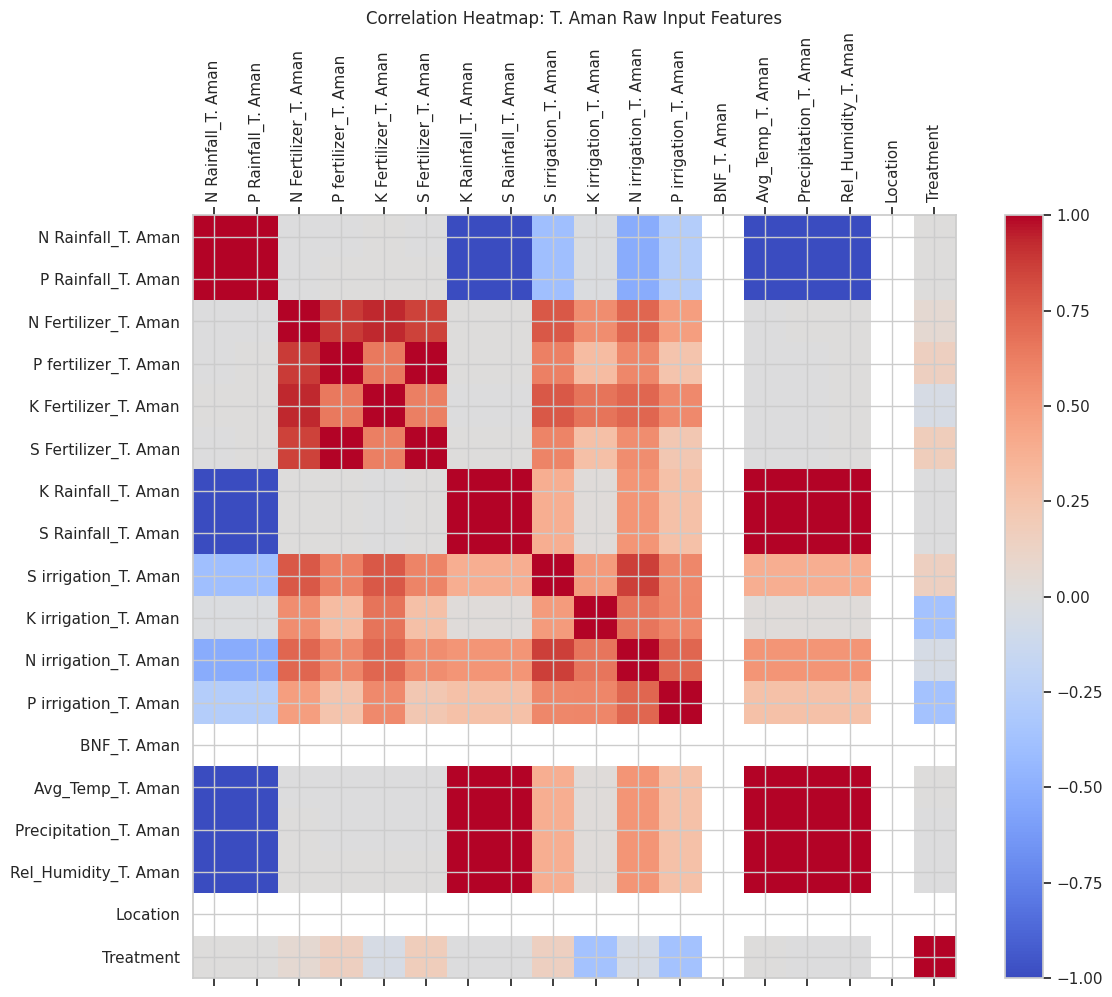

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the processed dataset
df = pd.read_excel('/content/Merged_Crop_Weather_Data.xlsx')

# 2. Define T. Aus features and target
nutrient_feats = [
    'N Rainfall_T. Aman',
    'P Rainfall_T. Aman',
    'N Fertilizer_T. Aman',
    'P fertilizer_T. Aman',
    'K Fertilizer_T. Aman',
    'S Fertilizer_T. Aman',
    'K Rainfall_T. Aman',
    'S Rainfall_T. Aman',
    'S irrigation_T. Aman',
    'K irrigation_T. Aman',
    'N irrigation_T. Aman',
    'P irrigation_T. Aman',
    'BNF_T. Aman'
]

weather_feats = [
    'Avg_Temp_T. Aman',
    'Precipitation_T. Aman',
    'Rel_Humidity_T. Aman'
]
meta_feats = ['Location', 'Treatment']

# 3. Subset and drop missing
cols = nutrient_feats + weather_feats + meta_feats
df_sub = df[cols].dropna()

# 4. Encode categorical meta features as numeric codes
for col in meta_feats:
    df_sub[col] = pd.Categorical(df_sub[col]).codes

# 5. Compute correlation matrix
corr = df_sub.corr()

# 6. Plot heatmap
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=90)
ax.set_yticks(range(len(cols)))
ax.set_yticklabels(cols)
ax.set_title('Correlation Heatmap: T. Aman Raw Input Features')
plt.tight_layout()
plt.show()


Building a web page by using Streamlit

In [14]:
# 1. Install dependencies (run once)
!pip install -q streamlit pyngrok pandas scikit-learn xgboost openpyxl

# 2. Write your Streamlit app to disk
script = """
import streamlit as st
import pandas as pd
import joblib

st.set_page_config(page_title="Crop Yield Predictor", layout="wide")
st.title("Interactive Crop Yield Prediction")

# ── STEP 1 ───────────────────
feature_defs = {
    "Boro": {
        "nutrient": [
            ('N Rainfall_Boro', "kg/ha"),
            ('P Rainfall_Boro', "kg/ha"),
            ('N Fertilizer_Boro', "kg/ha"),
            ('P fertilizer_Boro', "kg/ha"),
            ('K Fertilizer_Boro', "kg/ha"),
            ('S Fertilizer_Boro', "kg/ha"),
            ('K Rainfall_Boro', "kg/ha"),
            ('S Rainfall_Boro', "kg/ha"),
            ('S irrigation_Boro', "kg/ha"),
            ('K irrigation_Boro', "kg/ha"),
            ('N irrigation_Boro', "kg/ha"),
            ('P irrigation_Boro', "kg/ha"),
            ('BNF_Boro', "kg/ha"),
        ],
        "weather": [
            ('Avg_Temp_Boro', "°C"),
            ('Precipitation_Boro', "mm"),
            ('Rel_Humidity_Boro', "%"),
        ]
    },
    "T. Aus": {
        "nutrient": [
            ('N Rainfall_T. Aus', "kg/ha"),
            ('P Rainfall_T. Aus', "kg/ha"),
            ('N Fertilizer_T. Aus', "kg/ha"),
            ('P fertilizer_T. Aus', "kg/ha"),
            ('K Fertilizer_T. Aus', "kg/ha"),
            ('S Fertilizer_T. Aus', "kg/ha"),
            ('K Rainfall_T. Aus', "kg/ha"),
            ('S Rainfall_T. Aus', "kg/ha"),
            ('S irrigation_T. Aus', "kg/ha"),
            ('K irrigation_T. Aus', "kg/ha"),
            ('N irrigation_T. Aus', "kg/ha"),
            ('P irrigation_T. Aus', "kg/ha"),
            ('BNF_T. Aus', "kg/ha"),
        ],
        "weather": [
            ('Avg_Temp_T. Aus', "°C"),
            ('Precipitation_T. Aus', "mm"),
            ('Rel_Humidity_T. Aus', "%"),
        ]
    },
    "T. Aman": {
        "nutrient": [
            ('N Rainfall_T. Aman', "kg/ha"),
            ('P Rainfall_T. Aman', "kg/ha"),
            ('N Fertilizer_T. Aman', "kg/ha"),
            ('P fertilizer_T. Aman', "kg/ha"),
            ('K Fertilizer_T. Aman', "kg/ha"),
            ('S Fertilizer_T. Aman', "kg/ha"),
            ('K Rainfall_T. Aman', "kg/ha"),
            ('S Rainfall_T. Aman', "kg/ha"),
            ('S irrigation_T. Aman', "kg/ha"),
            ('K irrigation_T. Aman', "kg/ha"),
            ('N irrigation_T. Aman', "kg/ha"),
            ('P irrigation_T. Aman', "kg/ha"),
            ('BNF_T. Aman', "kg/ha"),
        ],
        "weather": [
            ('Avg_Temp_T. Aman', "°C"),
            ('Precipitation_T. Aman', "mm"),
            ('Rel_Humidity_T. Aman', "%"),
        ]
    }
}

# ── STEP 2 ───────────────────
@st.cache_data
def load_stats():
    df = pd.read_excel("Merged_Crop_Weather_Data.xlsx", engine="openpyxl")
    all_feats = []
    for s in feature_defs.values():
        for grp in s.values():
            all_feats.extend([f for f, _ in grp])
    min_vals = {f: float(df[f].min()) for f in all_feats}
    max_vals = {f: float(df[f].max()) for f in all_feats}
    return min_vals, max_vals

min_vals, max_vals = load_stats()

# ── STEP 3 ───────────────────
@st.cache_data
def load_data():
    df = pd.read_excel("Merged_Crop_Weather_Data.xlsx", engine="openpyxl")
    return (sorted(df["Location"].dropna().unique()),
            sorted(df["Treatment"].dropna().unique()))

location_options, treatment_options = load_data()

@st.cache_resource
def load_pipelines():
    return {
        "Boro":    joblib.load("boro_best_pipeline.pkl"),
        "T. Aus":  joblib.load("taus_best_pipeline.pkl"),
        "T. Aman": joblib.load("taman_best_pipeline.pkl"),
    }
pipelines = load_pipelines()

# ── STEP 4: Sidebar UI — Crop/Loc/Treatment ───────────────────
crop  = st.sidebar.selectbox("Select Crop Season", list(pipelines.keys()))
loc   = st.sidebar.selectbox("Location", location_options)
treat = st.sidebar.selectbox("Treatment", treatment_options)

st.sidebar.markdown("---")
st.sidebar.header("Numeric Inputs")

# 1)
inputs = {"Location": loc, "Treatment": treat}
for grp, feats in feature_defs[crop].items():
    st.sidebar.subheader(grp.capitalize())
    for f, unit in feats:
      label = f"{f} ({unit})"
      inputs[f] = st.sidebar.number_input(
            label,
            value=0.0,
            format="%.3f",
            step=0.01,
        )

# ── STEP 5 ───────────────────
clipped = {}
out_of_range = False
for f, val in inputs.items():
    if f in min_vals:
        low, high = min_vals[f], max_vals[f]
        new_val = max(low, min(high, val))
        if new_val != val:
            out_of_range = True
        clipped[f] = new_val
    else:
        clipped[f] = val

if out_of_range:
    st.warning("⚠️ Some inputs are beyond the historical range and have been automatically adjusted to a reasonable range.")

df_in = pd.DataFrame([clipped])

# ── STEP 6───────────────────
raw_pred = pipelines[crop].predict(df_in)[0]
pred     = max(raw_pred, 0)

st.subheader(f"Predicted Yield for {crop}")
st.metric("Yield (t/ha)", f"{pred:.2f}")
st.caption("⚠️ If predicted yield is negative, it will be displayed as 0")

#
with st.expander("Show Inputs & Debug"):
    st.write("Final inputs:", df_in)
    st.write("Raw prediction:", raw_pred)
    st.write("Displayed (≥0):", pred)

with st.expander("Show Inputs"):
    st.write(df_in)
"""
with open("streamlit_app.py", "w") as f:
    f.write(script)

print("✅ streamlit_app.py written.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00
✅ streamlit_app.py written.


In [15]:
import joblib
pipe = joblib.load("boro_best_pipeline.pkl")
pre  = pipe.named_steps['pre']

print("The columns expected by the preprocessor：", pre.feature_names_in_)

for name, transformer, cols in pre.transformers_:
    print(f"-- transformer '{name}' expects these cols:")
    print(cols)


The columns expected by the preprocessor： ['N Rainfall_Boro' 'P Rainfall_Boro' 'N Fertilizer_Boro'
 'P fertilizer_Boro' 'K Fertilizer_Boro' 'S Fertilizer_Boro'
 'K Rainfall_Boro' 'S Rainfall_Boro' 'S irrigation_Boro'
 'K irrigation_Boro' 'N irrigation_Boro' 'P irrigation_Boro' 'BNF_Boro'
 'Avg_Temp_Boro' 'Precipitation_Boro' 'Rel_Humidity_Boro' 'Location'
 'Treatment']
-- transformer 'num' expects these cols:
['N Rainfall_Boro', 'P Rainfall_Boro', 'N Fertilizer_Boro', 'P fertilizer_Boro', 'K Fertilizer_Boro', 'S Fertilizer_Boro', 'K Rainfall_Boro', 'S Rainfall_Boro', 'S irrigation_Boro', 'K irrigation_Boro', 'N irrigation_Boro', 'P irrigation_Boro', 'BNF_Boro', 'Avg_Temp_Boro', 'Precipitation_Boro', 'Rel_Humidity_Boro']
-- transformer 'cat' expects these cols:
['Location', 'Treatment']


In [16]:
!ls

boro_best_pipeline.pkl			sample_data
Crop_Weather_Data_2020_2021_final.xlsx	streamlit_app.py
Merged_Crop_Weather_Data.xlsx		taman_best_pipeline.pkl
newProcessed_Dataset.xlsx		taus_best_pipeline.pkl


In [17]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [18]:
!pip install streamlit pyngrok

In [19]:
%%bash
nohup streamlit run streamlit_app.py --server.port 8501 > streamlit.log 2>&1 &
sleep 5
curl -I http://localhost:8501


HTTP/1.1 200 OK
Server: TornadoServer/6.4.2
Content-Type: text/html
Date: Wed, 23 Jul 2025 13:26:52 GMT
Accept-Ranges: bytes
Etag: "e436b98bae4e72f535f635e022de01e3dd91818bf89b9e8520bc5a840b4033721ebf5cd2256701e7e820da842325f8ed74bb97a3d2ce967de3aa79bc5aa87104"
Last-Modified: Wed, 23 Jul 2025 13:26:25 GMT
Cache-Control: no-cache
Content-Length: 1522
Vary: Accept-Encoding



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0  1522    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


Website link

In [20]:
from pyngrok import ngrok
ngrok.kill()
# Terminate any active ngrok tunnels
ngrok.set_auth_token("2zKMoJVlzTWiILZl9EnoMfebXSL_89XyeDZ3nZu5yKfxiG8uJ")   # if not done already
public_url = ngrok.connect(8501)
print("🔗 Tunnel ready at", public_url)

🔗 Tunnel ready at NgrokTunnel: "https://eeb61af63a50.ngrok-free.app" -> "http://localhost:8501"
